# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
#!pip install imbalanced-learn
#!pip install --upgrade -q threadpoolctl

In [3]:
# !pip install xgboost

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
df = pd.read_csv("BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [6]:
df.shape

(10127, 21)

10127 rows and 21 columns

In [7]:
# make a copy
churn_data = df.copy()

In [8]:
# take a look at some sample data
churn_data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [9]:
# take a look at some sample data, this time the bottom rows
churn_data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [10]:
# take a look at the data types
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [11]:
# show uniques
churn_data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

* `Customer_Age` has only 45 unique values, likely meaning large groupings of similar ages.
* We have many continuous variables like `Avg_Open_To_Buy`, `Credit_Limit`, `Total_Revolving_Bal`, etc.
* `CLIENTNUM` consists of uniques ID for customers and will not add value to the modeling

In [12]:
# Can see that several of these columns have limited data types, so would be better as categories
# Converting the data type of columns with category like data to 'category'

category_col = ['Attrition_Flag','Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

churn_data[category_col] = churn_data[category_col].astype('category')

# take a look at the data types after conversion
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  category
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  category
 11  Months_Inactive_12_mon    10127 non-null  category
 12  Contacts_Count_12_mon     10127 non-null  category
 13  Credit_Limit              10127 non-null  floa

In [13]:
# Show category data
churn_data.describe(include=['category']).T

count unique                top  freq
Attrition_Flag            10127      2  Existing Customer  8500
Gender                    10127      2                  F  5358
Dependent_count           10127      6                  3  2732
Education_Level            8608      6           Graduate  3128
Marital_Status             9378      3            Married  4687
Income_Category           10127      6     Less than $40K  3561
Card_Category             10127      4               Blue  9436
Total_Relationship_Count  10127      6                  3  2305
Months_Inactive_12_mon    10127      7                  3  3846
Contacts_Count_12_mon     10127      7                  3  3380

In [14]:
# check for duplicate values
churn_data.duplicated().sum()

0

no duplicates

In [15]:
# check for missing values in the data, express as %
round(churn_data.isnull().sum() / churn_data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

* `Education_Level` column is missing 15% of the data.
* `Marital_Status` column is missing 7.4% of the data.
* These values will be imputed in the data processing.

In [16]:
# view the statistical summary of the numerical columns in the data
churn_data.describe().T

count          mean          std           min  \
CLIENTNUM             10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age          10127.000        46.326        8.017        26.000   
Months_on_book        10127.000        35.928        7.986        13.000   
Credit_Limit          10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal   10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy       10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1  10127.000         0.760        0.219         0.000   
Total_Trans_Amt       10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct        10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1   10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio 10127.000         0.275        0.276         0.000   

                                25%           50%           75%           max  
CLIENTNUM             713036770.500 717926358.000 773143533.000 828343083.000  
Customer_Age                 41.000        46.000        52.000        73.000  
Months_on_book               31.000        36.000        40.000        56.000  
Credit_Limit               2555.000      4549.000     11067.500     34516.000  
Total_Revolving_Bal         359.000      1276.000      1784.000      2517.000  
Avg_Open_To_Buy            1324.500      3474.000      9859.000     34516.000  
Total_Amt_Chng_Q4_Q1          0.631         0.736         0.859         3.397  
Total_Trans_Amt            2155.500      3899.000      4741.000     18484.000  
Total_Trans_Ct               45.000        67.000        81.000       139.000  
Total_Ct_Chng_Q4_Q1           0.582         0.702         0.818         3.714  
Avg_Utilization_Ratio         0.023         0.176         0.503         0.999

## Observations:

* Observations to be found in univariate analysis.

In [17]:
# view the statistical summary of the non-numerical columns in the data
churn_data.describe(exclude=np.number).T

count unique                top  freq
Attrition_Flag            10127      2  Existing Customer  8500
Gender                    10127      2                  F  5358
Dependent_count           10127      6                  3  2732
Education_Level            8608      6           Graduate  3128
Marital_Status             9378      3            Married  4687
Income_Category           10127      6     Less than $40K  3561
Card_Category             10127      4               Blue  9436
Total_Relationship_Count  10127      6                  3  2305
Months_Inactive_12_mon    10127      7                  3  3846
Contacts_Count_12_mon     10127      7                  3  3380

## Observations:

* Observations to be found in univariate analysis. 

In [18]:
#summarize all values of categories
for column in category_col:
    print(churn_data[column].value_counts())
    print("#" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
########################################
F    5358
M    4769
Name: Gender, dtype: int64
########################################
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
########################################
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
########################################
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
########################################
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
########################################
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: 

## Observations:

* Existing Customers comprise the bulk of the customers in this set.
* `Card_Category` of Blue also comprises a significant number of the customers in this set.
* Likewise, Females, Graduate educated, Married people are a clear majority in the data.
* Over a third make less than $40k a year with each of the remaining income levels having very similar distribution. 
* There is an anomalous value for `Income_Category` of abc
* There is missing data in the `Education_Level` and `Marital_Status` categories.
* Will replace all missing data with the most common value for each.

In [19]:
# deal with anomalous value
churn_data[churn_data.Income_Category == "abc"]

CLIENTNUM     Attrition_Flag  Customer_Age Gender Dependent_count  \
19     709327383  Existing Customer            45      F               2   
28     718813833  Existing Customer            44      F               3   
39     708300483  Attrited Customer            66      F               0   
44     720572508  Existing Customer            38      F               4   
58     711427458  Existing Customer            44      F               5   
...          ...                ...           ...    ...             ...   
10021  711149133  Attrited Customer            30      F               1   
10040  714677583  Attrited Customer            50      F               3   
10083  718170033  Existing Customer            42      F               4   
10092  713437008  Attrited Customer            40      F               3   
10119  716893683  Attrited Customer            55      F               3   

      Education_Level Marital_Status Income_Category Card_Category  \
19           Graduate        Married             abc          Blue   
28         Uneducated         Single             abc          Blue   
39          Doctorate        Married             abc          Blue   
44           Graduate         Single             abc          Blue   
58           Graduate        Married             abc          Blue   
...               ...            ...             ...           ...   
10021        Graduate        Married             abc          Blue   
10040       Doctorate         Single             abc          Blue   
10083      Uneducated        Married             abc          Blue   
10092        Graduate        Married             abc          Blue   
10119      Uneducated         Single             abc          Blue   

       Months_on_book Total_Relationship_Count Months_Inactive_12_mon  \
19                 37                        6                      1   
28                 34                        5                      2   
39                 56                        5                      4   
44                 28                        2                      3   
58                 35                        4                      1   
...               ...                      ...                    ...   
10021              18                        4                      1   
10040              36                        4                      3   
10083              23                        4                      1   
10092              25                        1                      2   
10119              47                        4                      3   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
19                        2     14470.000                 1157   
28                        2     10100.000                    0   
39                        3      7882.000                  605   
44                        3      9830.000                 2055   
58                        2      6273.000                  978   
...                     ...           ...                  ...   
10021                     4      4377.000                 2517   
10040                     3      5173.000                    0   
10083                     2      8348.000                    0   
10092                     3      6888.000                 1878   
10119                     3     14657.000                 2517   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
19           13313.000                 0.966             1207              21   
28           10100.000                 0.525             1052              18   
39            7277.000                 1.052              704              16   
44            7775.000                 0.977             1042              23   
58            5295.000                 2.275             1359              25   
...                ...                   ...              ...             ...   
10021         18

In [20]:
# make anomalous values NaN
churn_data.Income_Category.replace(to_replace="abc", value=np.nan, inplace=True)

In [21]:
# check for missing 
round(churn_data.Income_Category.isnull().sum() / churn_data.Income_Category.isnull().count() * 100, 2)

10.98

In [22]:
# use mode for missing values
churn_data.Income_Category = churn_data.Income_Category.fillna(
    value=churn_data["Income_Category"].value_counts().index[0]
)

In [23]:
# check replacements
#Less than $40K    3561
#$40K - $60K       1790
#$80K - $120K      1535
#$60K - $80K       1402
#abc               1112
#$120K +            727
churn_data.Income_Category.value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [24]:
# check for missing 
round(churn_data.Education_Level.isnull().sum() / churn_data.Education_Level.isnull().count() * 100, 2)

15.0

In [25]:
# use mode for missing values
churn_data.Education_Level = churn_data.Education_Level.fillna(
    value=churn_data["Education_Level"].value_counts().index[0]
)

In [26]:
# check for missing 
round(churn_data.Education_Level.isnull().sum() / churn_data.Education_Level.isnull().count() * 100, 2)

0.0

In [27]:
# check for missing 
round(churn_data.Marital_Status.isnull().sum() / churn_data.Marital_Status.isnull().count() * 100, 2)

7.4

In [28]:
# use mode for missing values
churn_data.Marital_Status = churn_data.Marital_Status.fillna(
    value=churn_data["Marital_Status"].value_counts().index[0]
)

In [29]:
# check for missing 
round(churn_data.Marital_Status.isnull().sum() / churn_data.Marital_Status.isnull().count() * 100, 2)

0.0

In [30]:
# CLIENTNUM consists of uniques ID for customer and will not add value to the modeling so delete.
churn_data.drop(["CLIENTNUM"], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

In [31]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [32]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [33]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

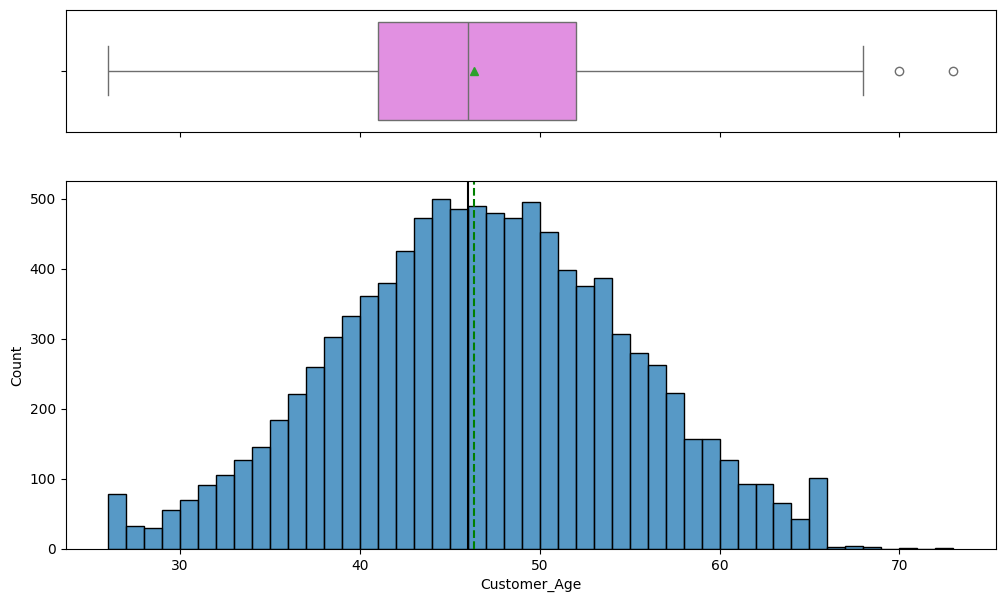

In [35]:
# Observations on Customer_age
histogram_boxplot(churn_data, "Customer_Age")

### Observations
* The distribution of `Customer_Age` is normal.
* The plot shows outliers at the right side (high end of age)
* We will not adjust these outliers as they represent real ages and trends in age.

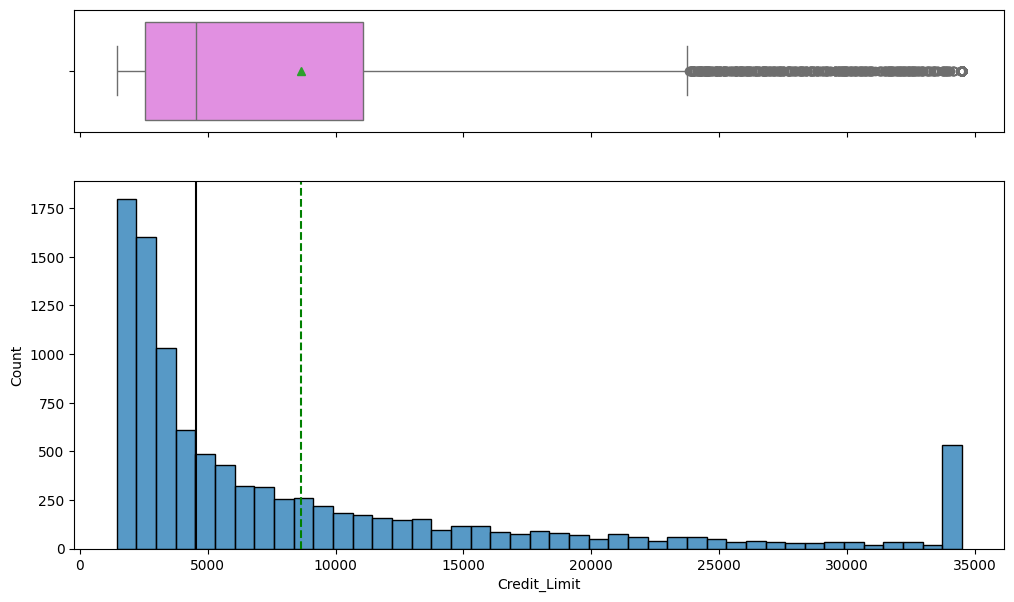

In [36]:
# observations on Credit_Limit
histogram_boxplot(churn_data, "Credit_Limit")

### Observations
* The distribution of `Credit_Limit` is right-skewed
* The plot shows outliers on the right end.
* We will not adjust these outliers as they represent real data and trends.

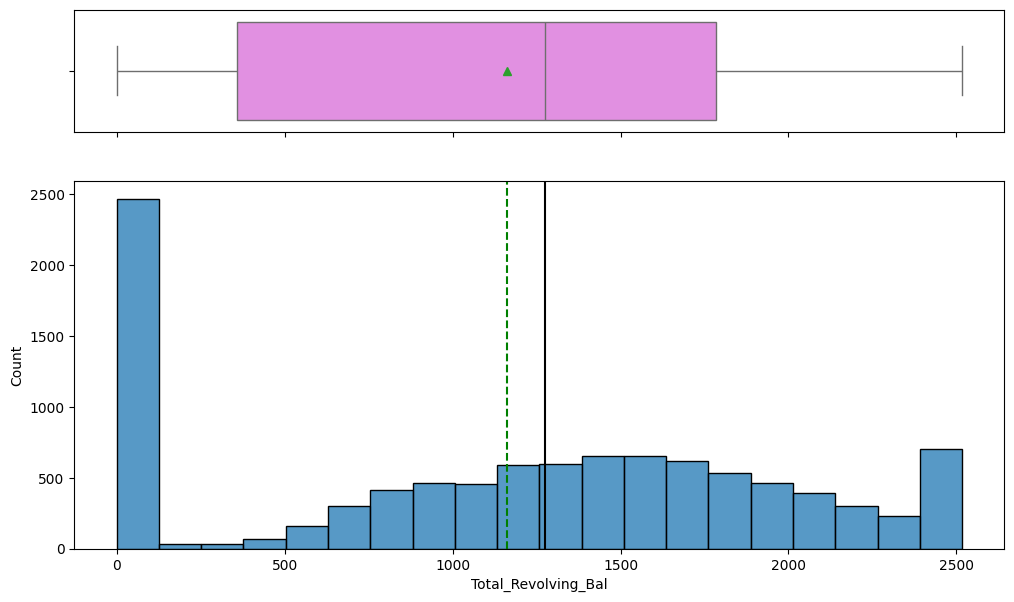

In [37]:
# observations on balance
histogram_boxplot(churn_data, "Total_Revolving_Bal")

### Observations
* The distribution of `Total_Revolving_Bal` is close to normal.
* A large number of customers carry little to no balance.
* The boxplot shows that there are no outliers.

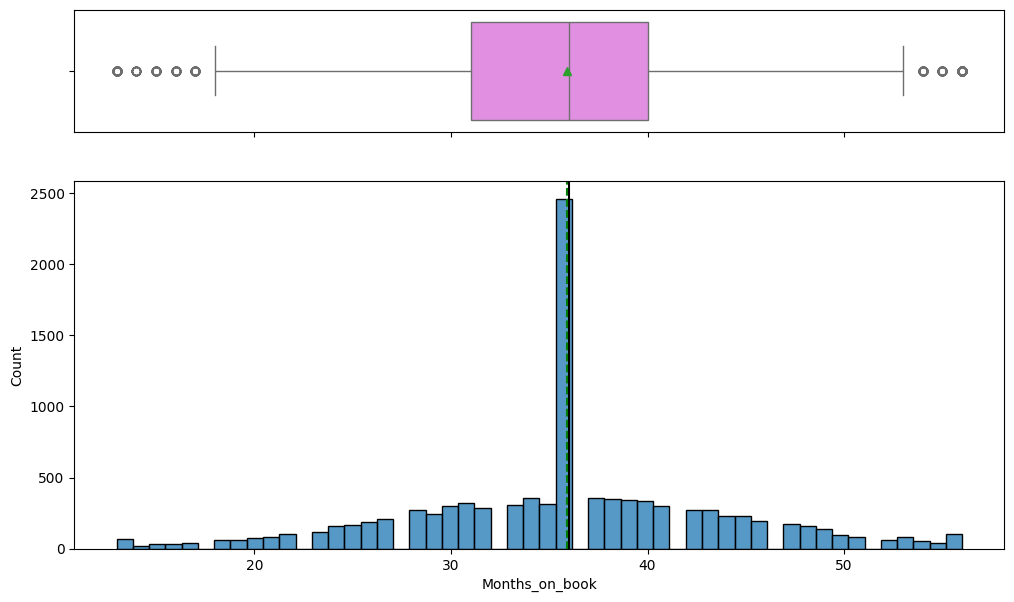

In [38]:
# observations on book months
histogram_boxplot(churn_data, "Months_on_book")

### Observations
* The distribution of `Months_on_book` is close to normal with a large cluster around the median and mean.
* The median lies around 37 `Months_on_book`
* The plot shows outliers on the right and left sides.
* We will not adjust these outliers as they represent real data and trends.

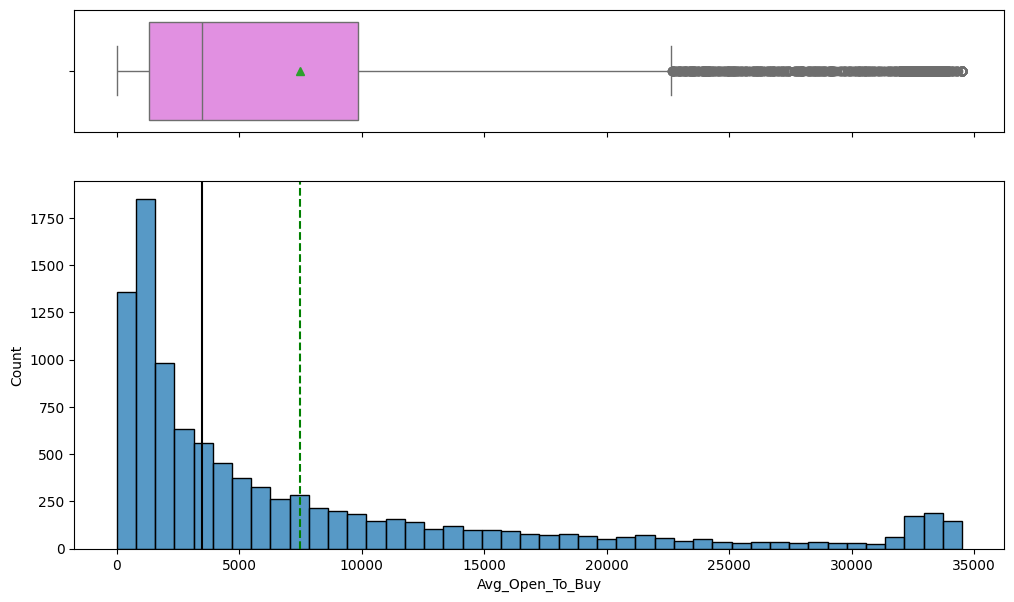

In [39]:
# observations on Avg_Open_To_Buy
histogram_boxplot(churn_data, "Avg_Open_To_Buy")

### Observations
* The distribution of `Avg_Open_To_Buy` is right-skewed.
* There are many outliers to the right end of the plot.
* We will not adjust these outliers as they represent real data and trends.

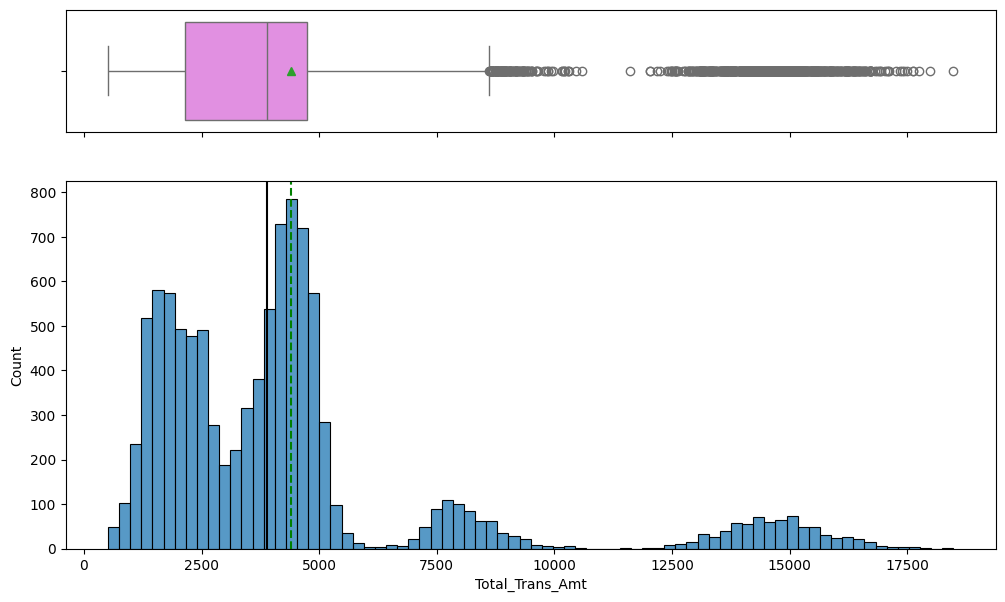

In [40]:
# observations on Total_Trans_Amt
histogram_boxplot(churn_data, "Total_Trans_Amt")

### Observations
* The distribution for `Total_Trans_Amt` is right-skewed
* There are many outliers to the right end of the plot.
* We will not adjust these outliers as they represent real data and trends.

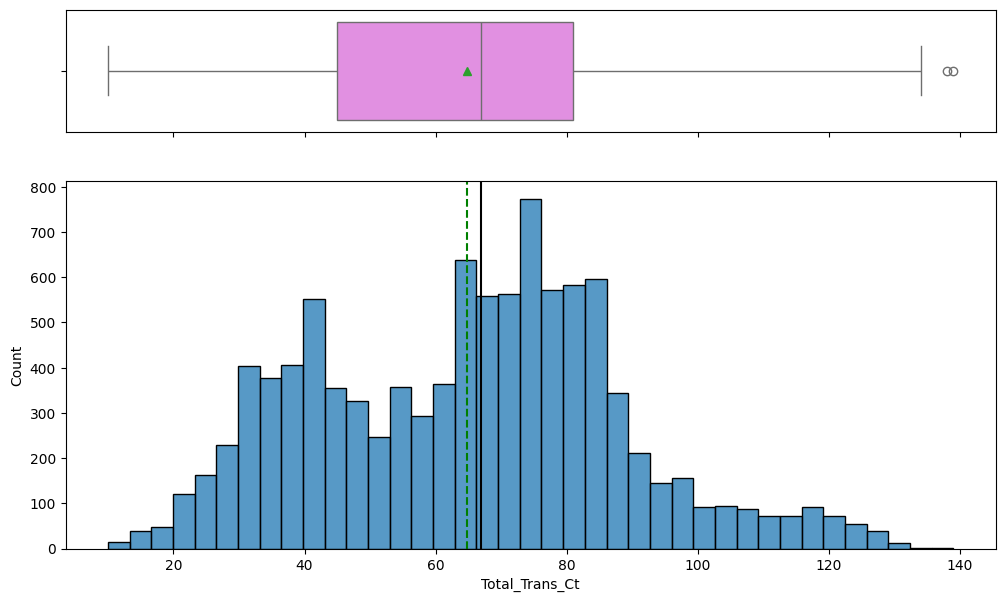

In [41]:
# observations on Total_Trans_Ct
histogram_boxplot(churn_data, "Total_Trans_Ct")

### Observations
* The distribution for `Total_Trans_Ct` is close to normal.
* There are a few outliers to the right end of the plot.
* We will not adjust these outliers as they represent real data and trends.

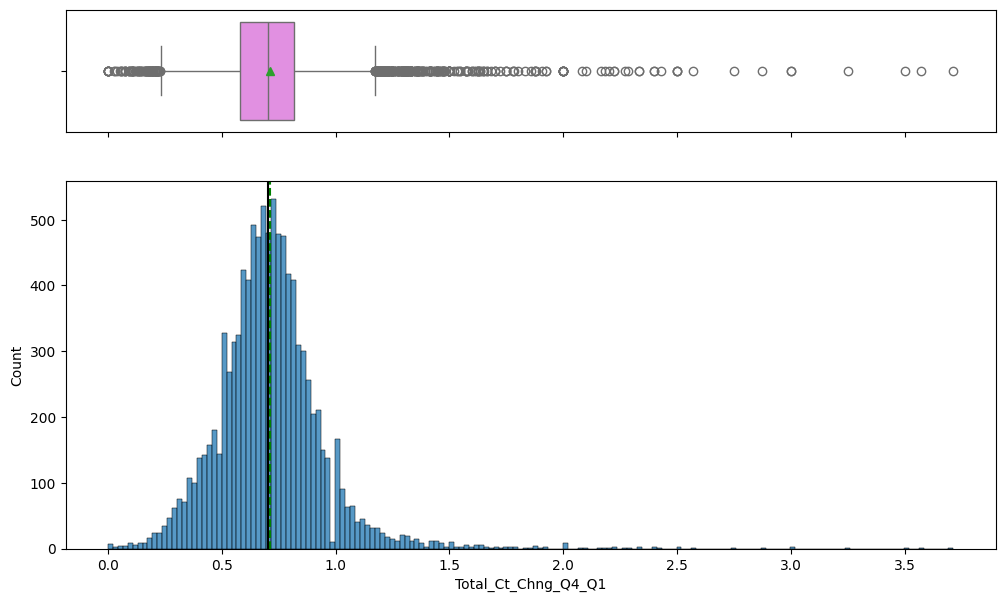

In [42]:
# observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(churn_data, "Total_Ct_Chng_Q4_Q1")

### Observations
* The distribution for `Total_Ct_Chng_Q4_Q1` is right-skewed.
* There are many outliers to the right and left end of the plot.
* We will not adjust these outliers as they represent real data and trends.

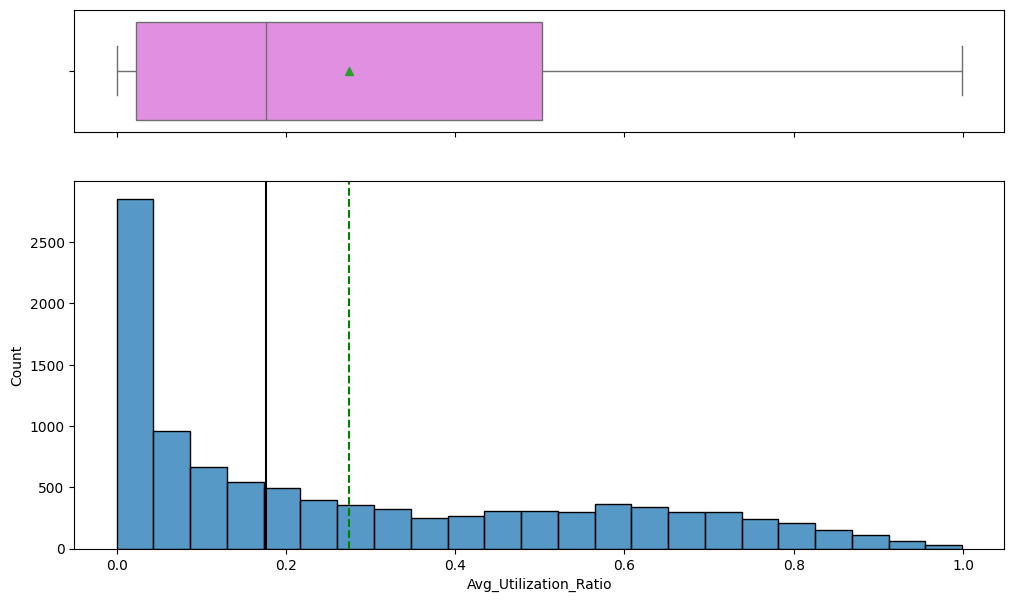

In [43]:
# observations on Avg_Utilization_Ratio
histogram_boxplot(churn_data, "Avg_Utilization_Ratio")

### Observations
* The distribution of `Avg_Utilization_Ratio` is right-skewed.
* There are no outliers in this variable

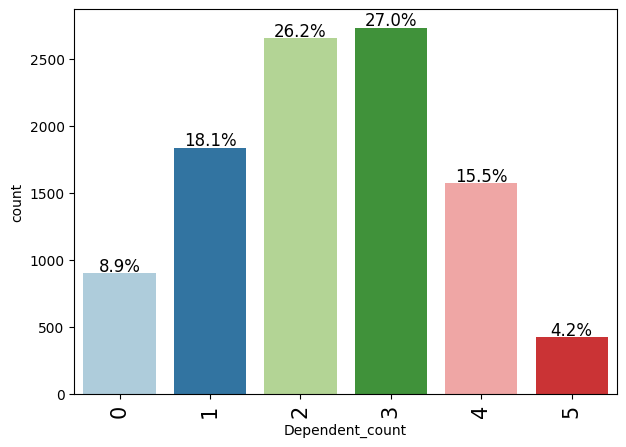

In [44]:
# observations on Attrition_Flag
labeled_barplot(churn_data, "Dependent_count", perc=True)

### Observations
* The distribution of `Dependent_count` is normal.

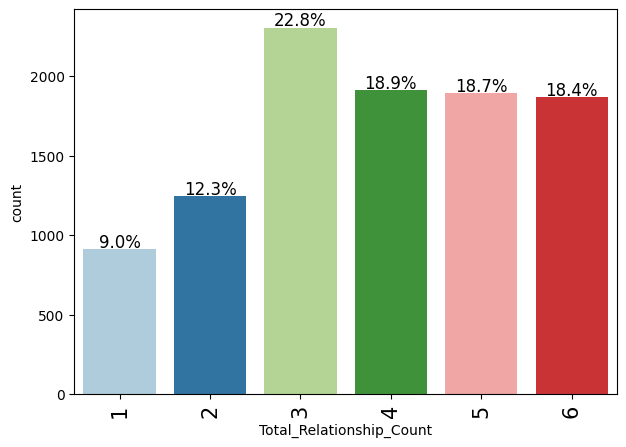

In [45]:
# observations on Attrition_Flag
labeled_barplot(churn_data, "Total_Relationship_Count", perc=True)

### Observations
* The distribution of `Total_Relationship_Count` is left skewed.
* The mean and median lie around 4 products per customer.
* There is a large number of customers with 3 products.

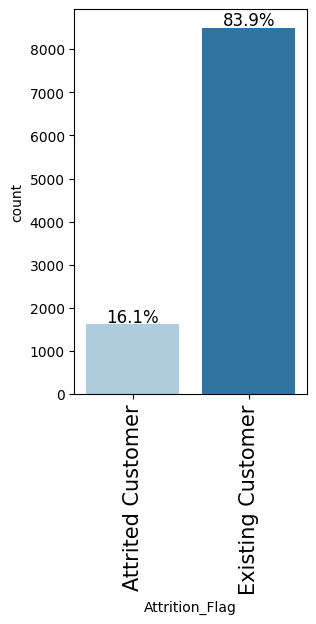

In [46]:
# observations on Attrition_Flag
labeled_barplot(churn_data, "Attrition_Flag", perc=True)

### Observations
* A majority of customers are Existing Customers.
* The distribution of `Attrition_Flag` is imbalanced.

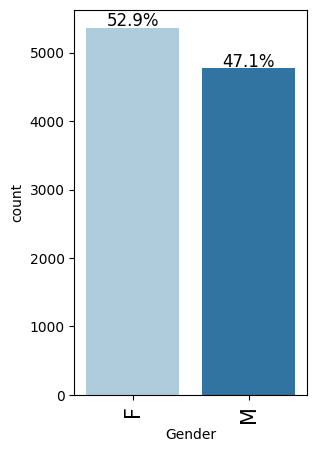

In [47]:
# observations on Sex
labeled_barplot(churn_data, "Gender", perc=True)

### Observations
* Female customers hold more credit cards than male customers

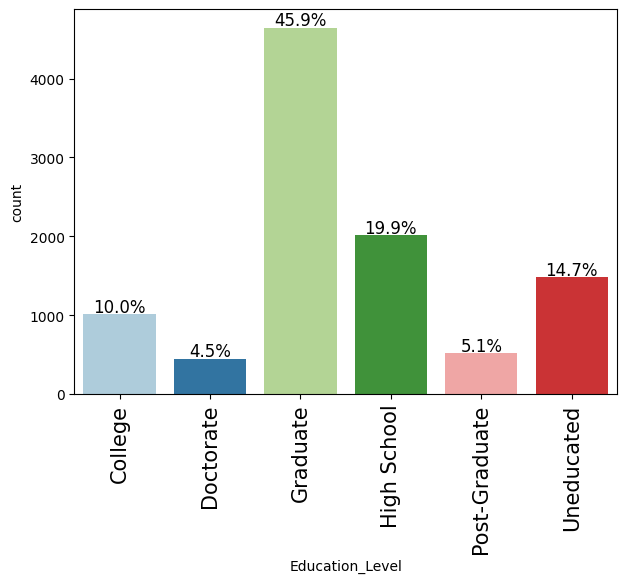

In [48]:
# observations on barplot
labeled_barplot(churn_data, "Education_Level", perc=True)

###### Observations
* Close to 46% of credit card holders have a Graduate degree. (originally 31% before imputation)
* Close to 20% only have a High School education.

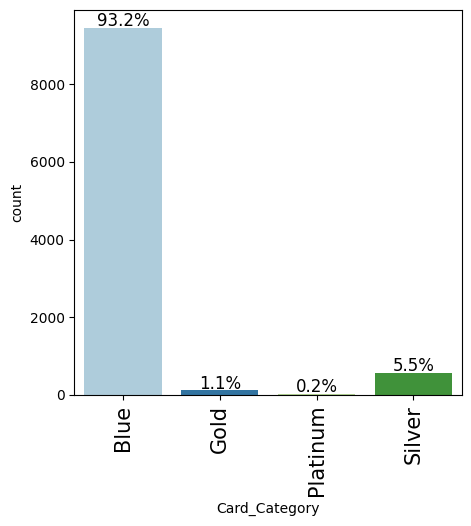

In [49]:
# observations on barplot
labeled_barplot(churn_data, "Card_Category", perc=True)

### Observations
* An overwhelming number of customers have a `Card_Category` of Blue.
* Slighly over 1% have Gold status and only .2% have Platinum which could correlate to `Credit_Limit` and `Income_Category`.

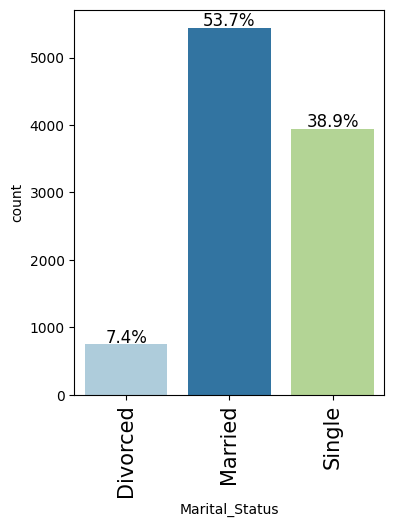

In [50]:
# observations on Saving accounts
labeled_barplot(churn_data, "Marital_Status", perc=True)

### Observations
* About 53% of customers are married. (46% before imputation)
* About 39% of customer are single.
* Divorced customers seem low given common trends.

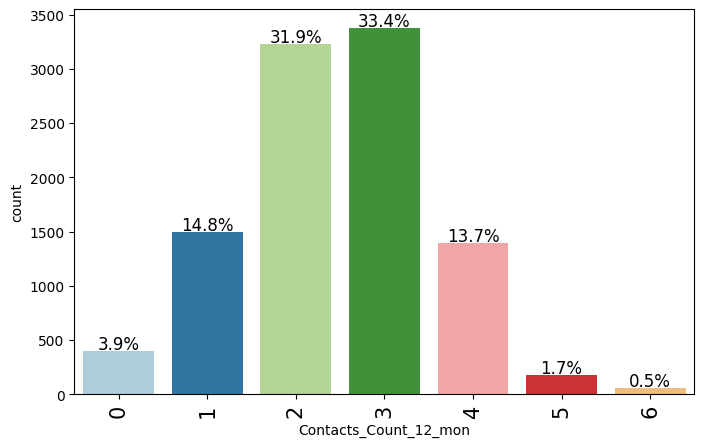

In [51]:
# observations on barplot
labeled_barplot(churn_data, "Contacts_Count_12_mon", perc=True)

### Observations
* Most customers have had 3 `Contacts_Count_12_mon` with another large grouping with 2.
* 81.3% have had 2 or more interactions within the last 12 months.

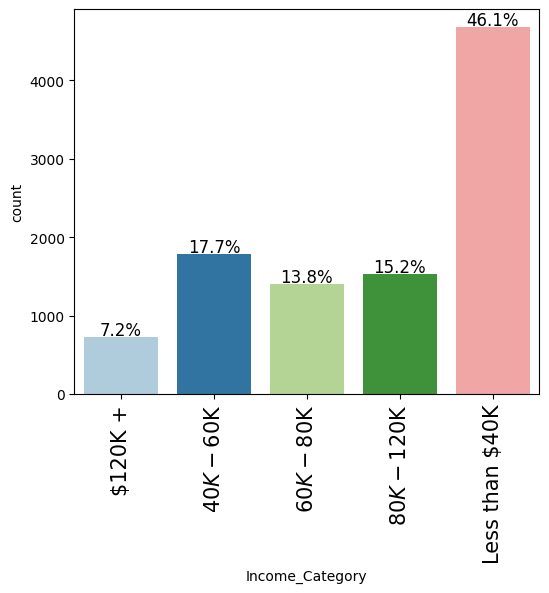

In [52]:
# observations on barplot
labeled_barplot(churn_data, "Income_Category", perc=True)

### Observations
* almost half of customers make Less than 40K

## Bivariate Analysis

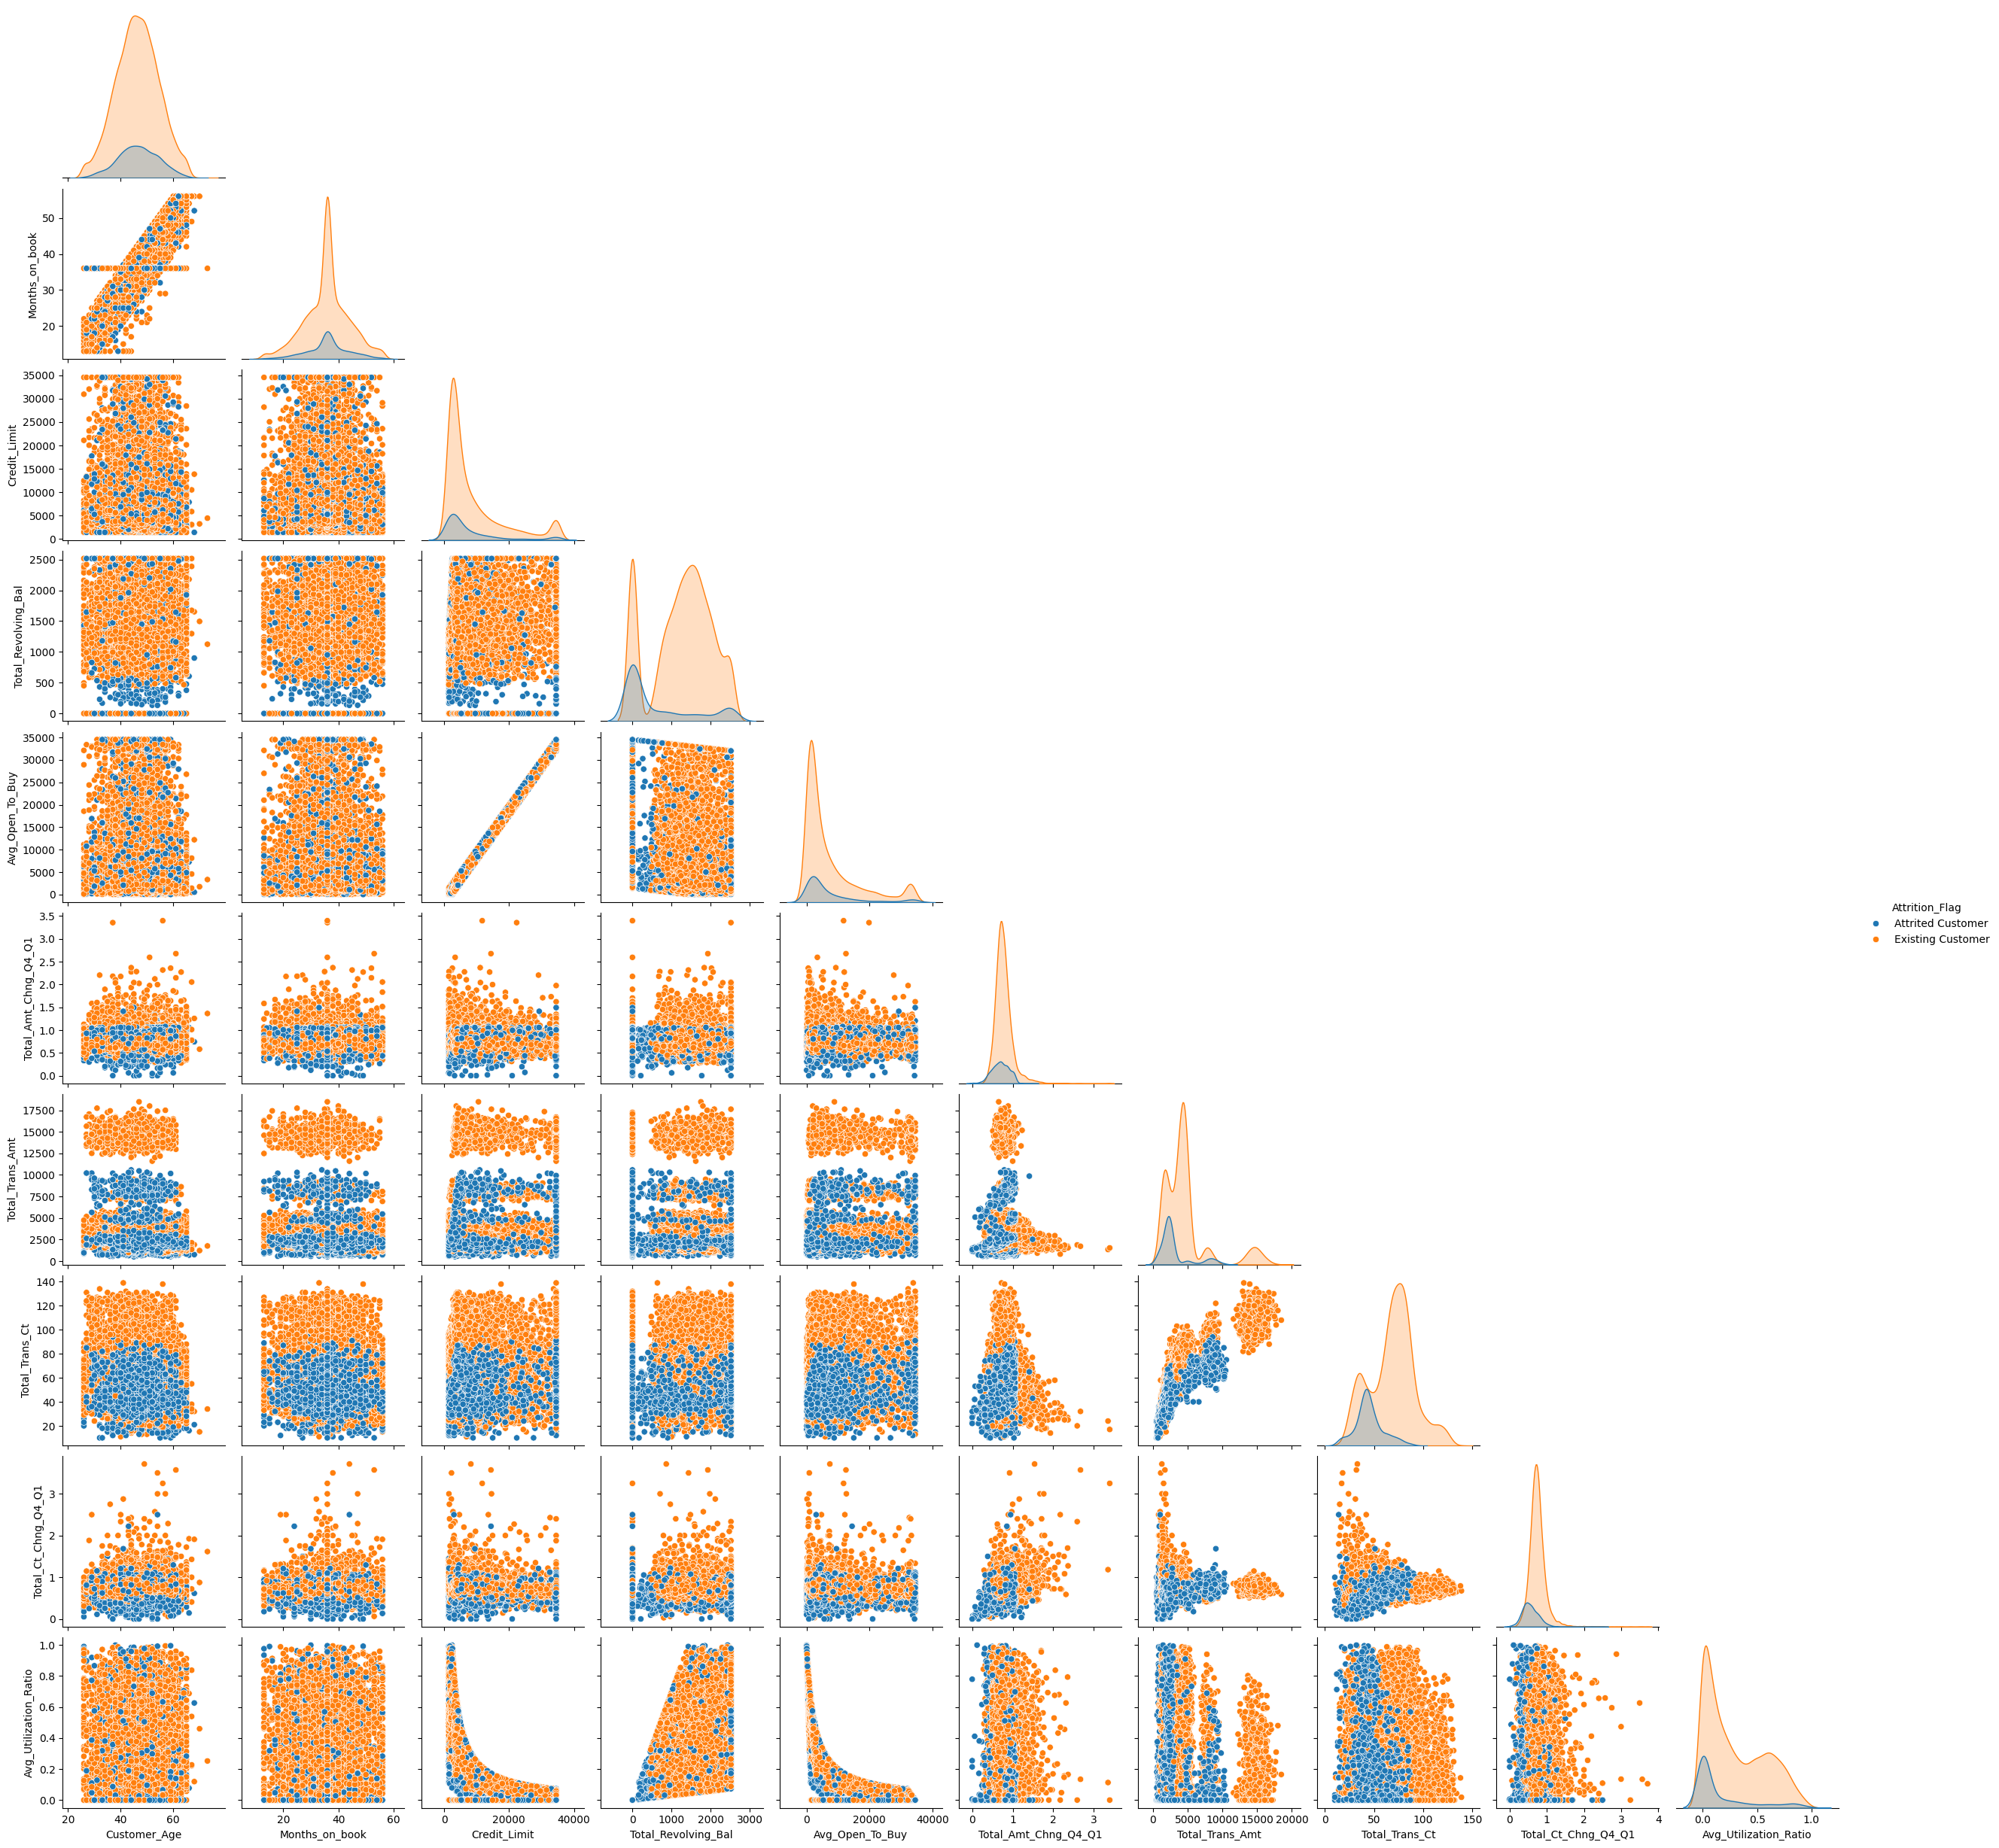

In [53]:
# seaborn pairplot
sns.pairplot(churn_data, hue="Attrition_Flag",corner=True)

### Observations

* There is no clear differentiator in the distribution for existing and attrited customers
* Attrited customers do appear to predominantely appear in the lower part of each plot, specifically for:
    * `Total_Trans_Amt`
    * `Total_Trans_Ct`
    * `Total_Revolving_Bal`
    * `Total_Ct_Chng_Q4_Q1`
    * `Total_Amt_Chng_Q4_Q1`
    
We will now perform further analysis of these plots.

`Total_Revolving_Bal` vs `Attrition_Flag`

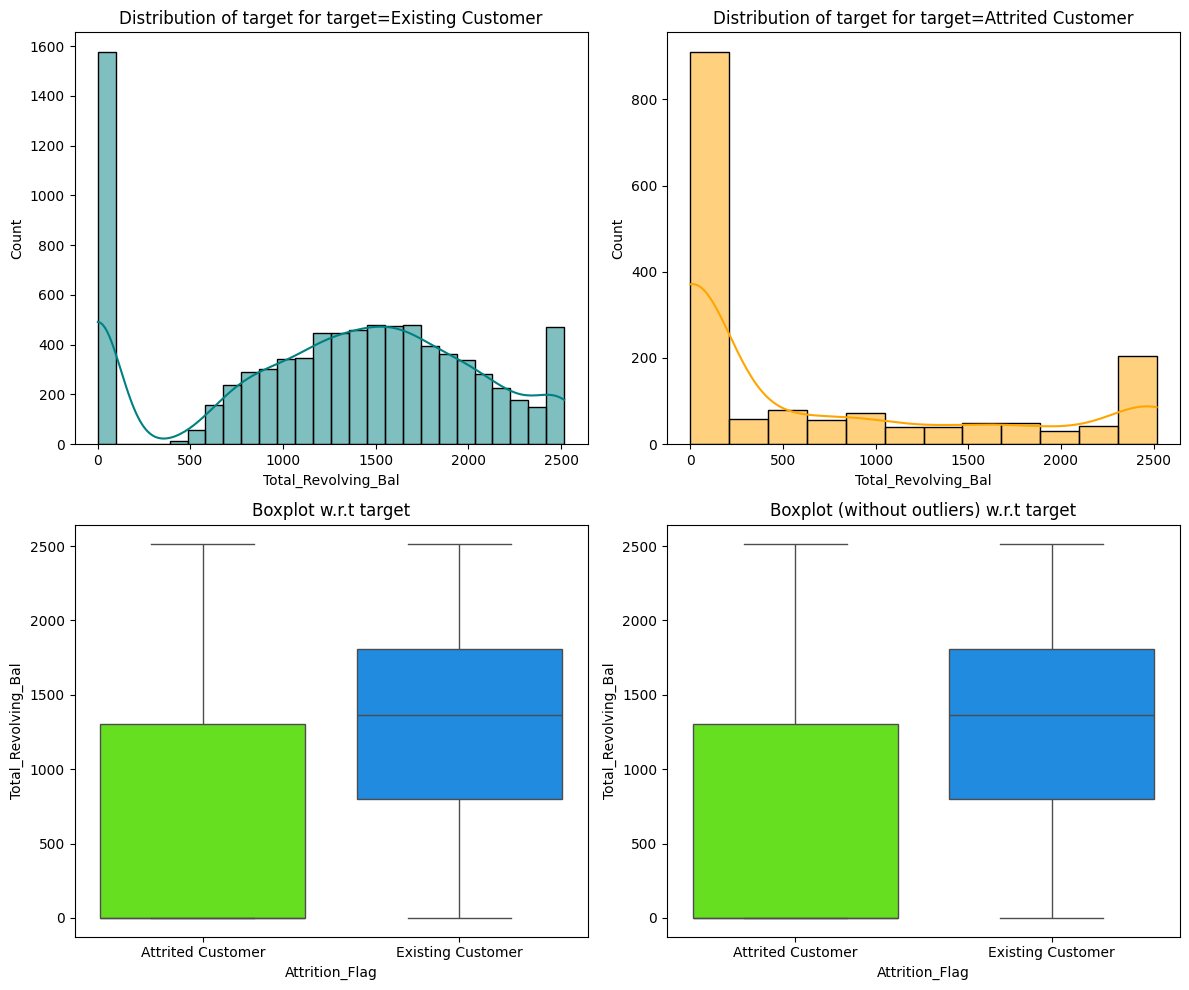

In [54]:
distribution_plot_wrt_target(churn_data, "Total_Revolving_Bal", "Attrition_Flag")

### Observations
* Customers with less `Total_Revolving_Bal` are more likely to attrit.
* This could indicate that they cleared their balances before closing their accounts, or that they used their account less and canceled due to that.

`Attrition_Flag vs Credit_Limit`

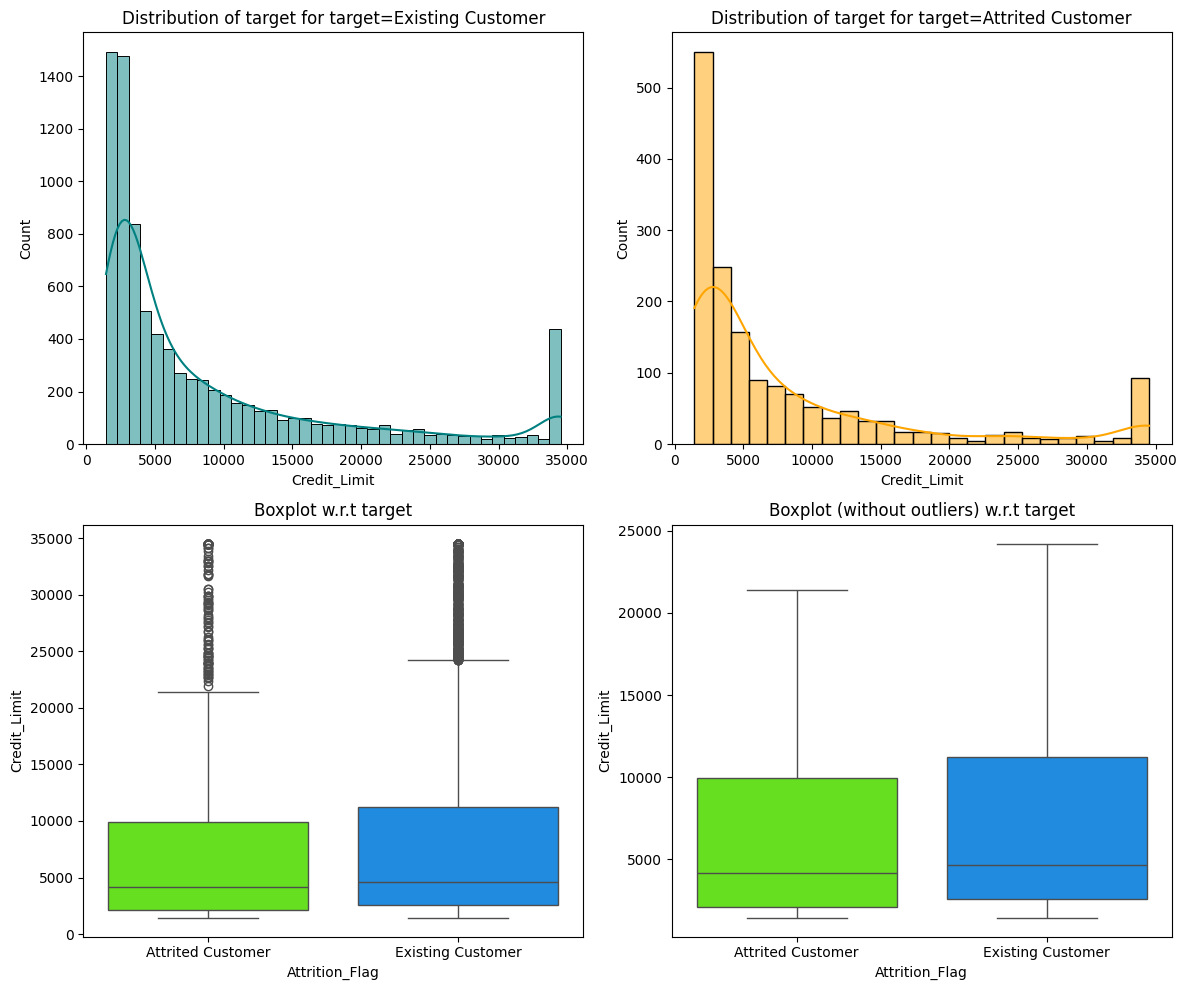

In [55]:
distribution_plot_wrt_target(churn_data, "Credit_Limit", "Attrition_Flag")

### Observations
* Customers with lower credit limits are more likely to attrit. 
* There are many outliers for both Existing and Attrited customers.

`Attrition_Flag vs Customer_Age`

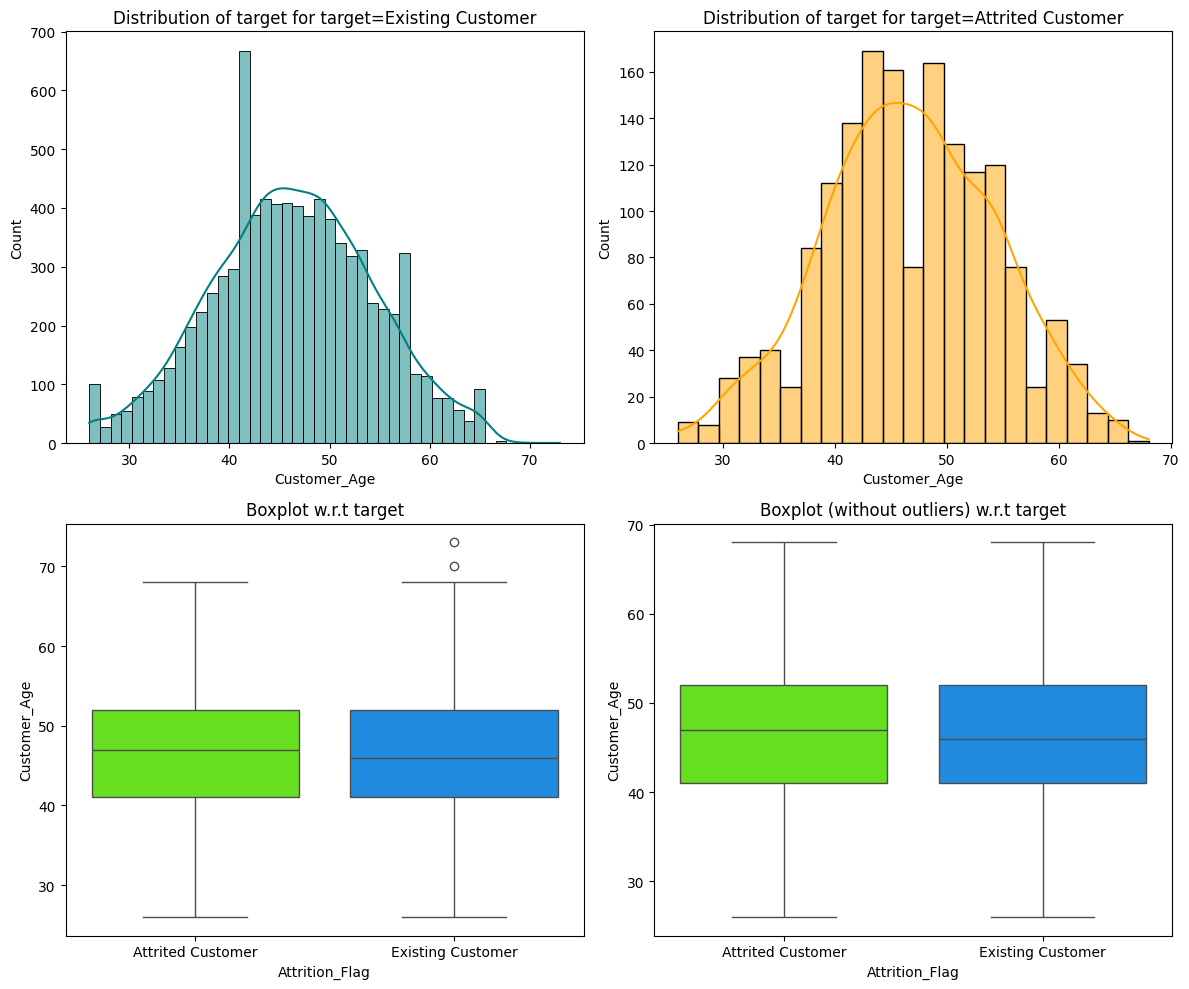

In [56]:
distribution_plot_wrt_target(churn_data, "Customer_Age", "Attrition_Flag")

### Observations
* The median age of Attrited customers is higher than existing.
* Younger customers are less likely to attrit.

`Total_Trans_Ct` vs `Attrition_Flag`

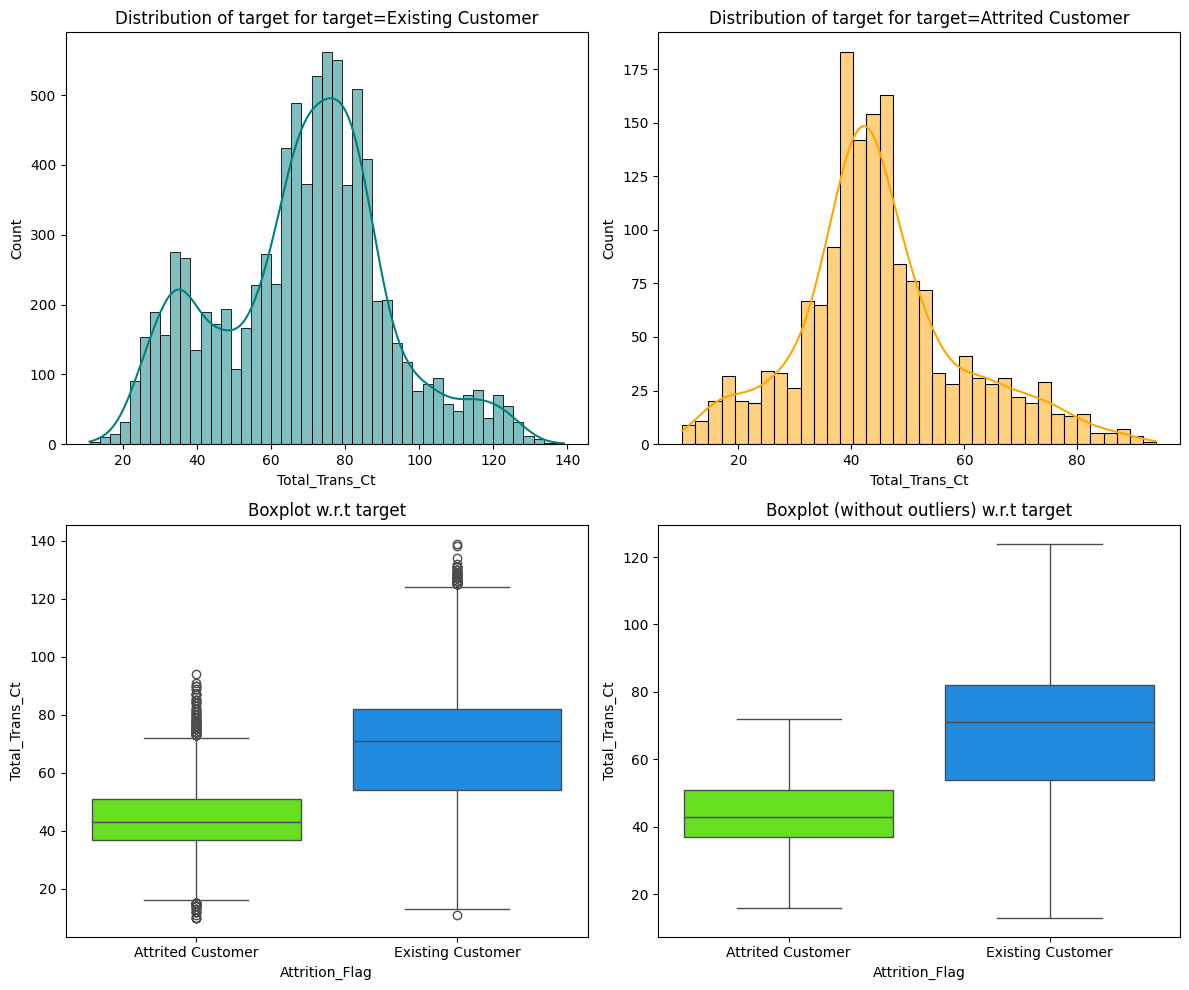

In [57]:
distribution_plot_wrt_target(churn_data, "Total_Trans_Ct", "Attrition_Flag")

### Observations
* Customers who attrit have much lower `Total_Trans_Ct`
* There are many outliers for both Existing and Attrited customers.
* Customers who show an average `Total_Trans_Ct` of around 40, or less than 60 annually are more likely to attrit. 

`Total_Trans_Amt` vs `Attrition_Flag`

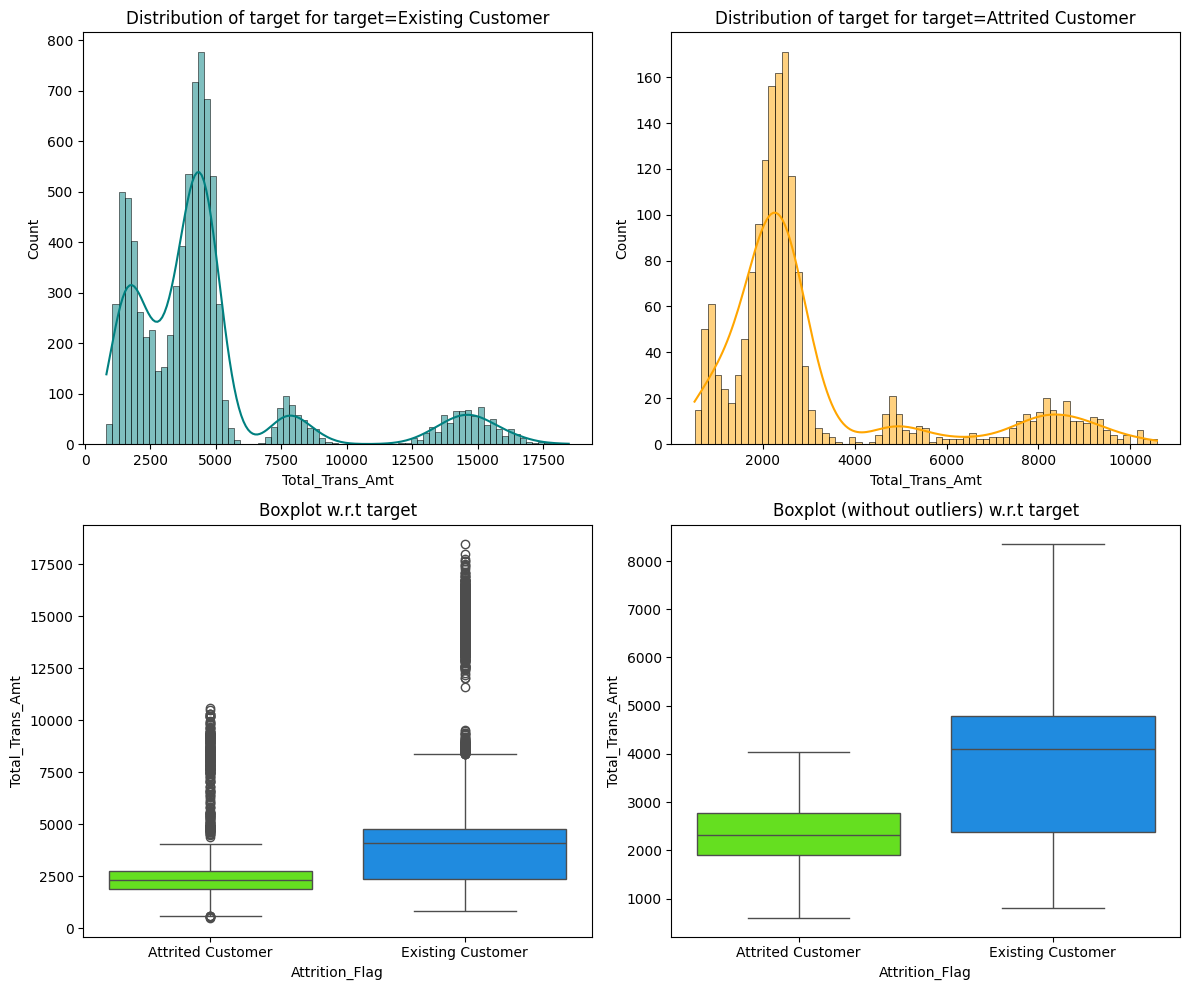

In [58]:
distribution_plot_wrt_target(churn_data, "Total_Trans_Amt", "Attrition_Flag")

### Observations
* Customers who attrit have much lower `Total_Trans_Amt`
* There are many outliers for both Existing and Attrited customers.
* Customers who have an average `Total_Trans_Amt` less than $2500 are more likely to attrit.

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

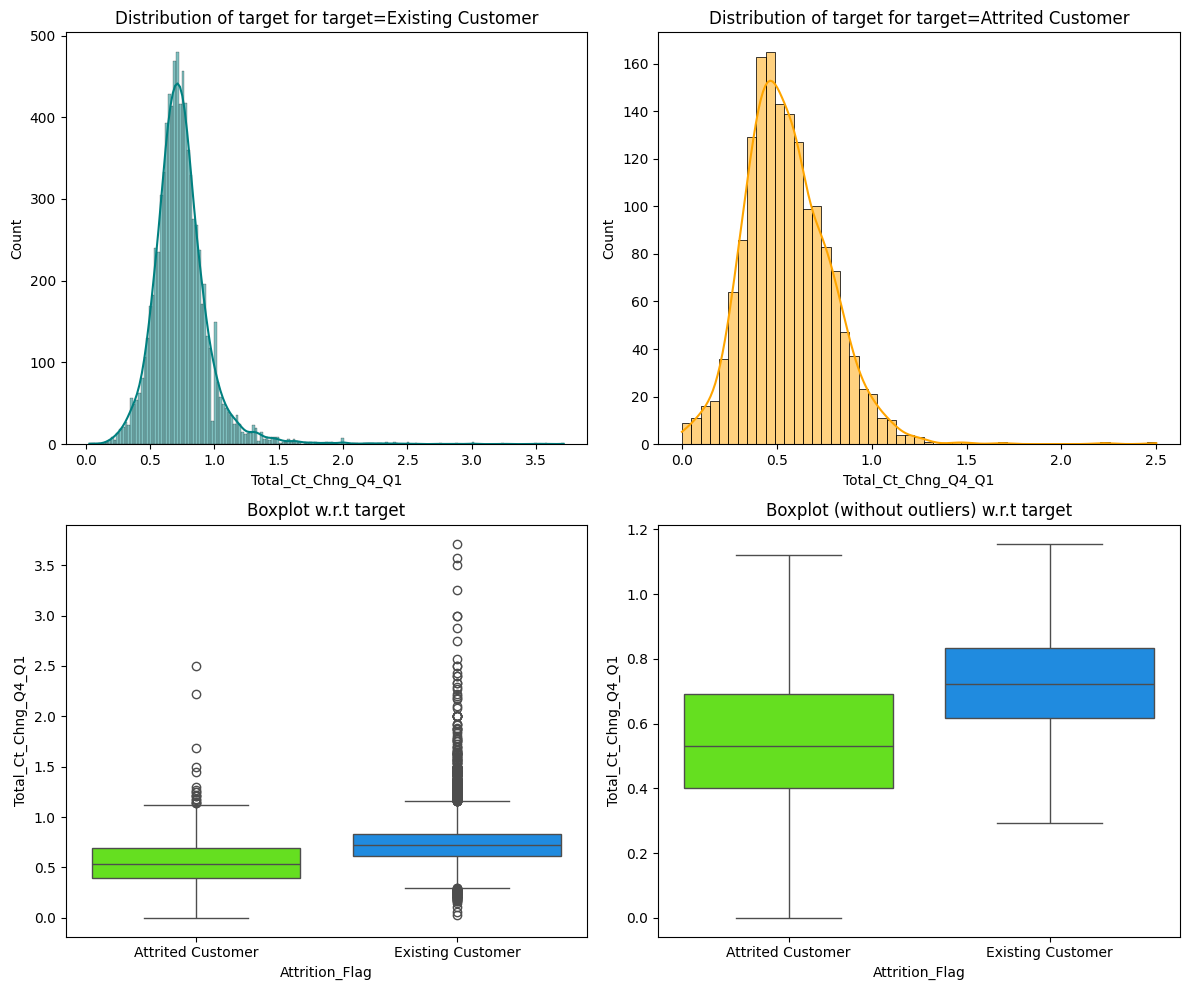

In [59]:
distribution_plot_wrt_target(churn_data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

### Observations
* Customers who attrit have a lower `Total_Ct_Chng_Q4_Q1`
* There are many outliers for both Existing and Attrited customers, but significantly more for Existing. Likely this simply indicates usage patterns around the holidays.
* Customers who have an average `Total_Ct_Chng_Q4_Q1` less than 0.5 are more likely to attrit.

`Avg_Utilization_Ratio` vs `Attrition_Flag`

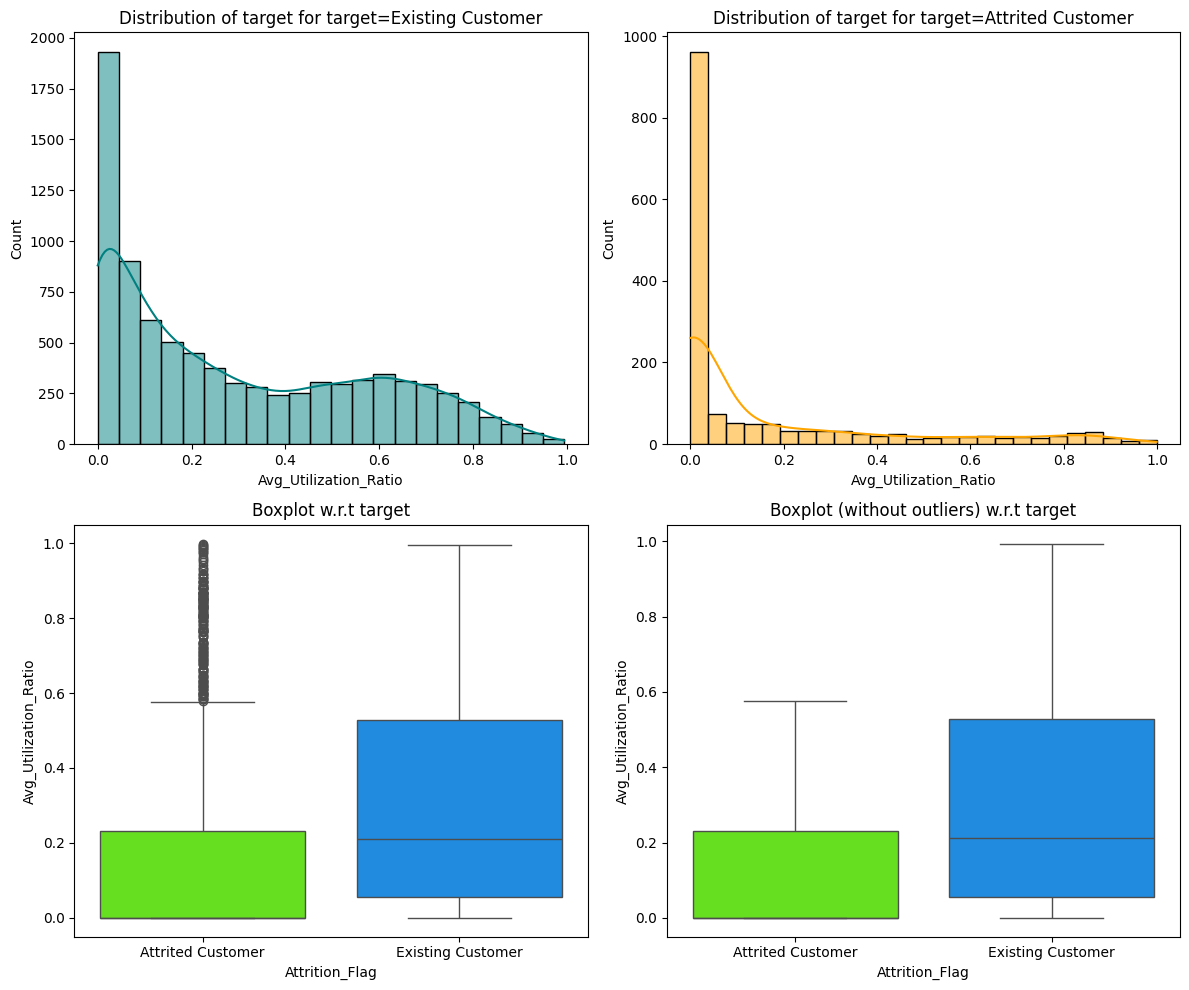

In [60]:
distribution_plot_wrt_target(churn_data, "Avg_Utilization_Ratio", "Attrition_Flag")

### Observations
* Customers who attrit have much lower `Avg_Utilization_Ratio`
* There are many outliers for Attrited customers.

`Attrition_Flag vs Months_on_book`

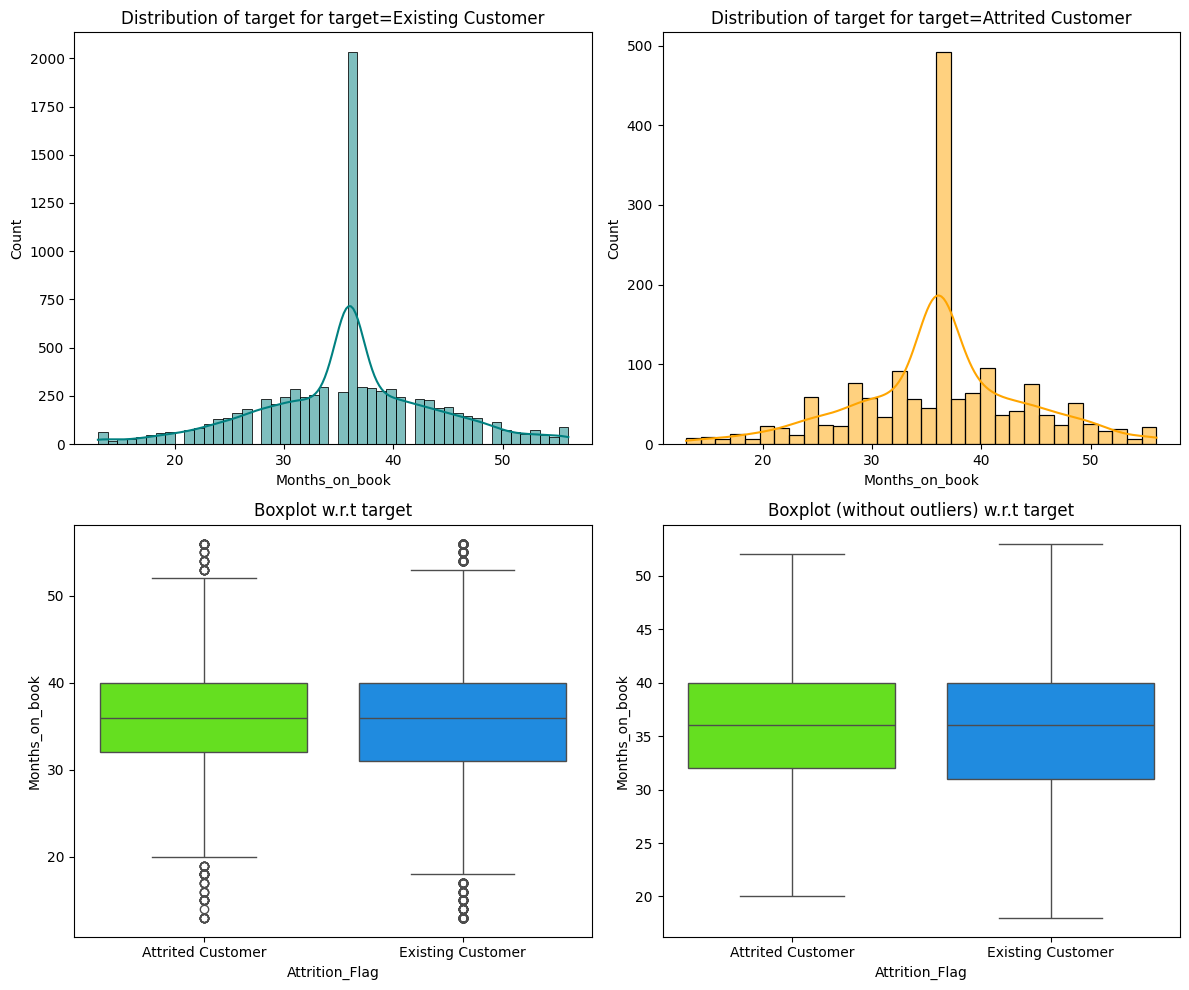

In [61]:
distribution_plot_wrt_target(churn_data, "Months_on_book", "Attrition_Flag")

### Observations
* The distribution for both Existing and Attrited customers is about the same.
* Likely this will not contribute to the model in any significant way.

`Attrition_Flag vs Total_Revolving_Bal`

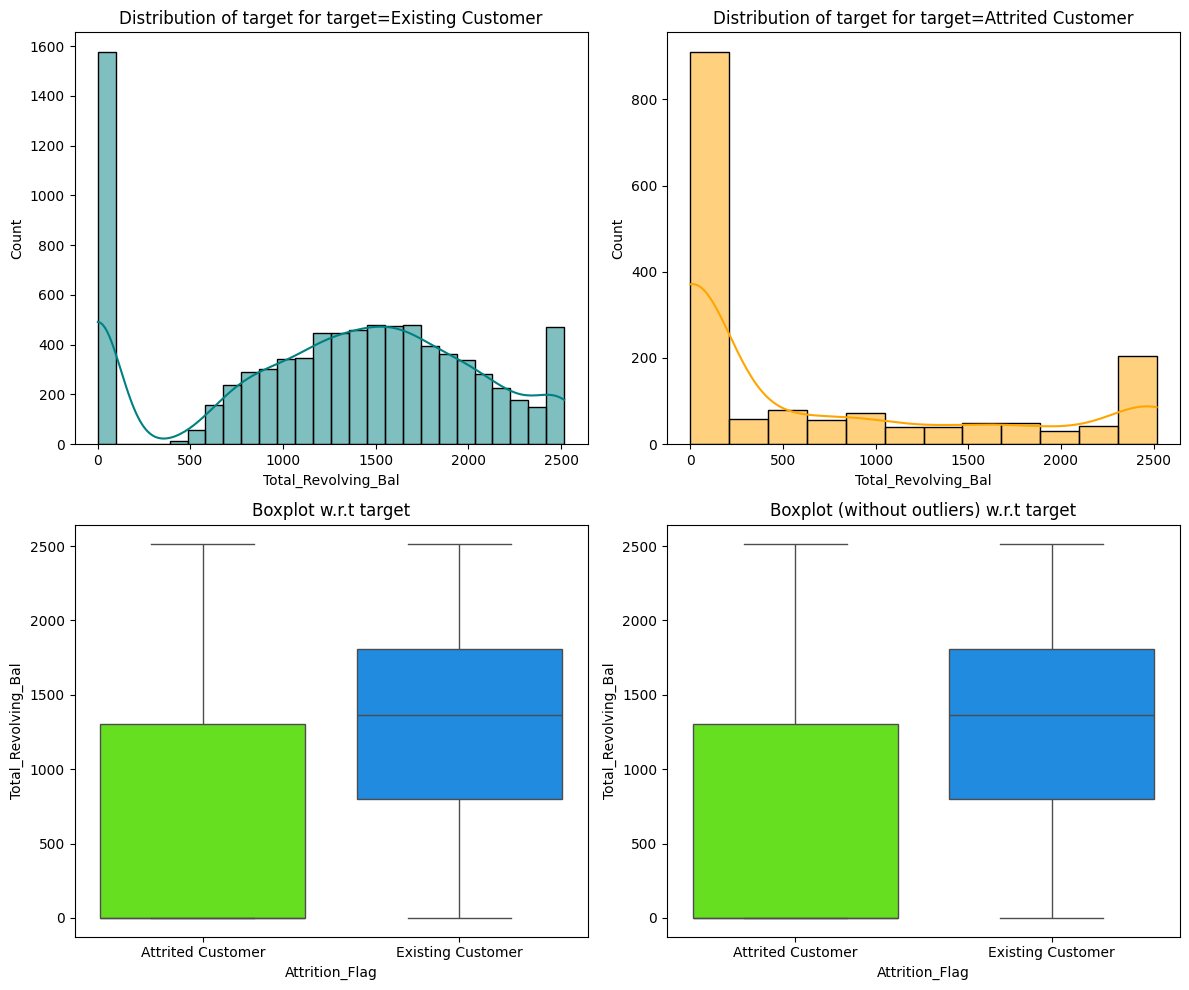

In [62]:
distribution_plot_wrt_target(churn_data, "Total_Revolving_Bal", "Attrition_Flag")

### Observations
* Customers who attrit have much lower `Total_Revolving_Bal`
* Customers who have a `Total_Revolving_Bal` less than $1500 are more likely to attrit.

`Attrition_Flag vs Avg_Open_To_Buy`

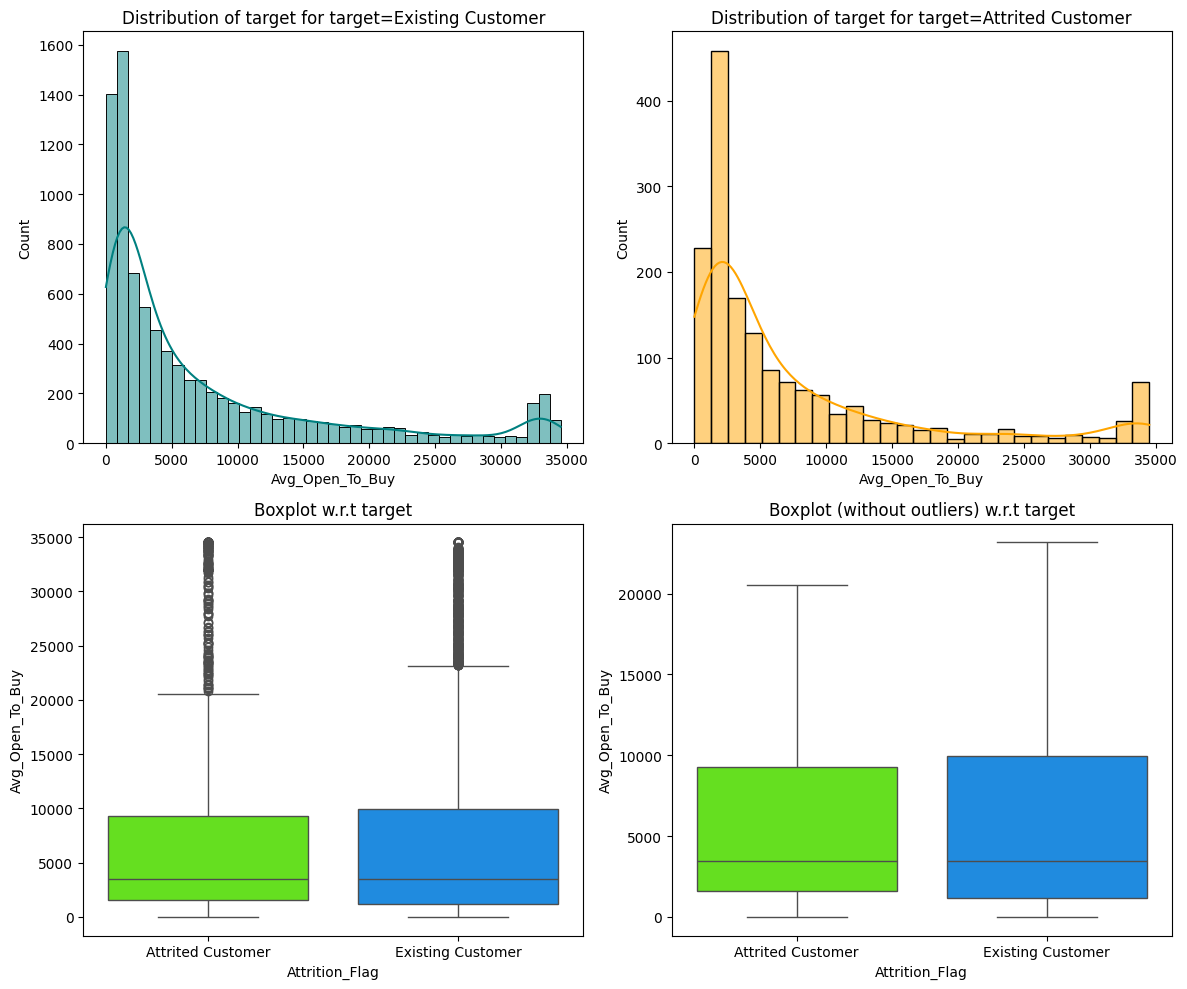

In [63]:
distribution_plot_wrt_target(churn_data, "Avg_Open_To_Buy", "Attrition_Flag")

### Observations
* The distribution for both Existing and Attrited customers is about the same.
* Likely this will not contribute to the model in any significant way.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


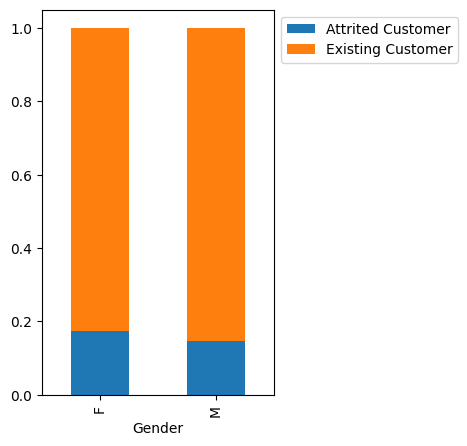

In [64]:
stacked_barplot(churn_data, "Gender", "Attrition_Flag")

### Observations
* Both genders are close to equal in attrition ratio.
* Females represent a slight majority here, but make up a majority of the data.

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
All                           1627               8500  10127
Graduate                       743               3904   4647
High School                    306               1707   2013
Uneducated                     237               1250   1487
College                        154                859   1013
Doctorate                       95                356    451
Post-Graduate                   92                424    516
------------------------------------------------------------------------------------------------------------------------


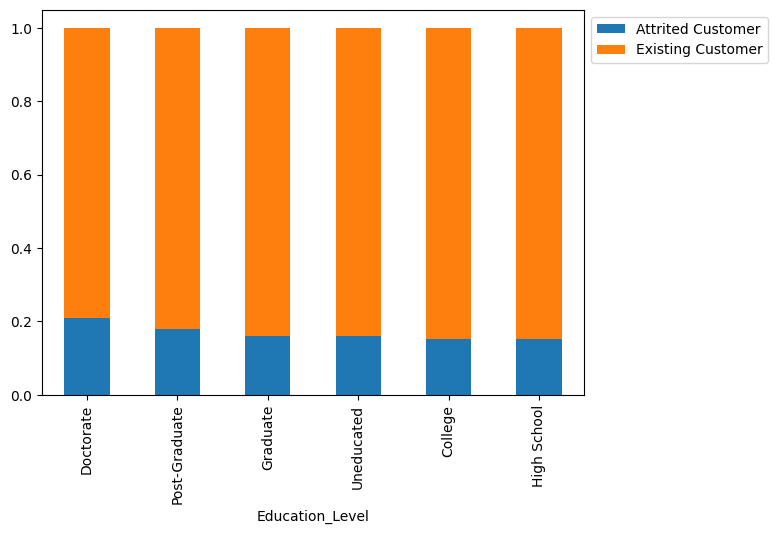

In [65]:
stacked_barplot(churn_data, "Education_Level", "Attrition_Flag")

### Observations
* Customers with all `Education_Level` are close to equal in attrition ratio.
* Those with a Doctorate attrit at a slightly increased rate.

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


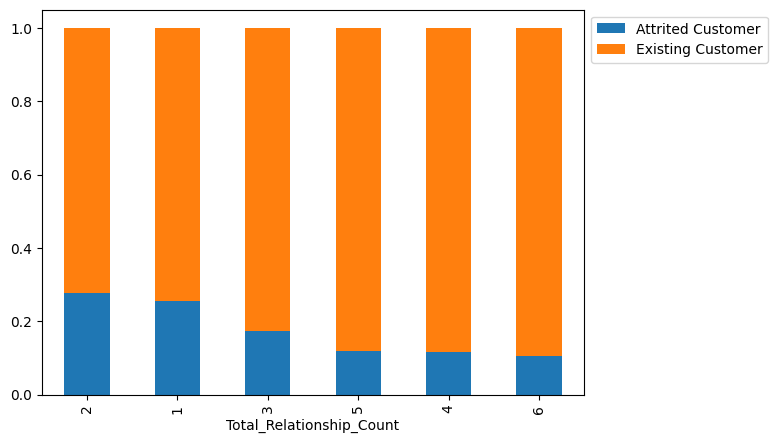

In [66]:
stacked_barplot(churn_data, "Total_Relationship_Count", "Attrition_Flag")

### Observations
* Customers with 3 or less `Total_Relationship_Count` attrit at a higher ratio
* Customers with 2 or less `Total_Relationship_Count` attrit at an even higher ratio

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


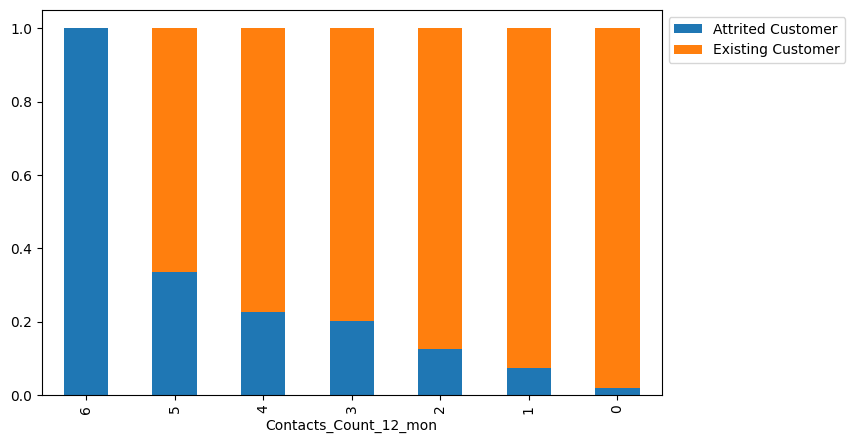

In [67]:
stacked_barplot(churn_data, "Contacts_Count_12_mon", "Attrition_Flag")

### Observations
* Those with higher `Contacts_Count_12_mon` attrit at a much higher ratio.
* Those with 6 interactions attrit at 100%, possibly indicating some dissatistfaction with the service.

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


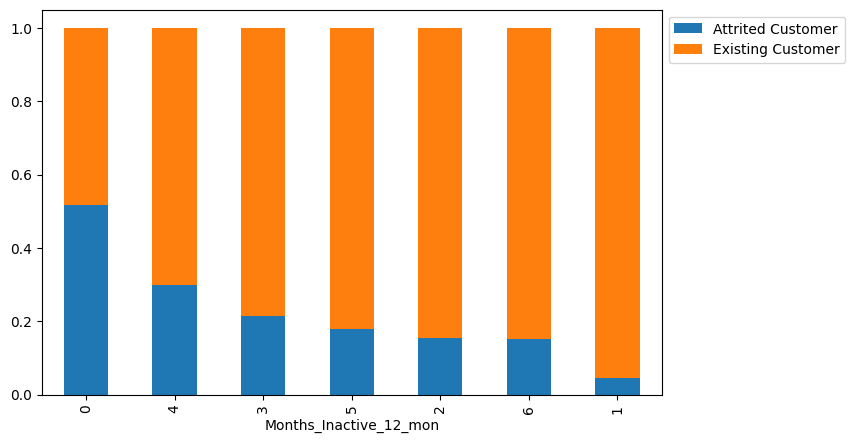

In [68]:
stacked_barplot(churn_data, "Months_Inactive_12_mon", "Attrition_Flag")

### Observations
* Customers with 3 or 4 `Months_Inactive_12_mon` attrit at a higher ratio
* Customers with 0 `Months_Inactive_12_mon` attrit at an almost 50% ratio. Possibly indicates a stop in using the card right before cancelling.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


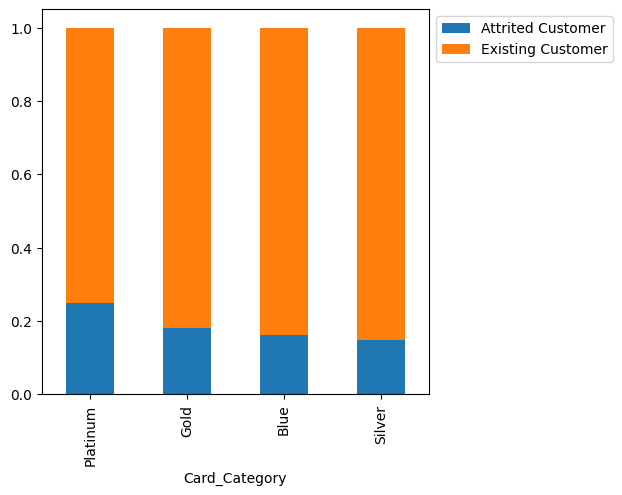

In [69]:
stacked_barplot(churn_data, "Card_Category", "Attrition_Flag")

### Observations
* Customers with a Silver or Blue card are less likely to attrit.
* Customers with Platinum or Gold cards are more likley to attrit.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 799               3874   4673
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


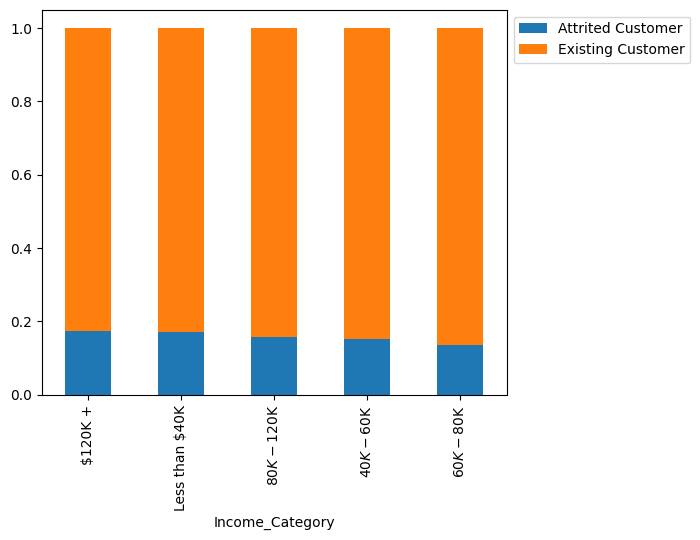

In [70]:
stacked_barplot(churn_data, "Income_Category", "Attrition_Flag")

### Observations
* All income levels appear to attrit in similar ratios.
* Those making > $120k have a slightly higher ration of attrition as compared to other income levels.

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


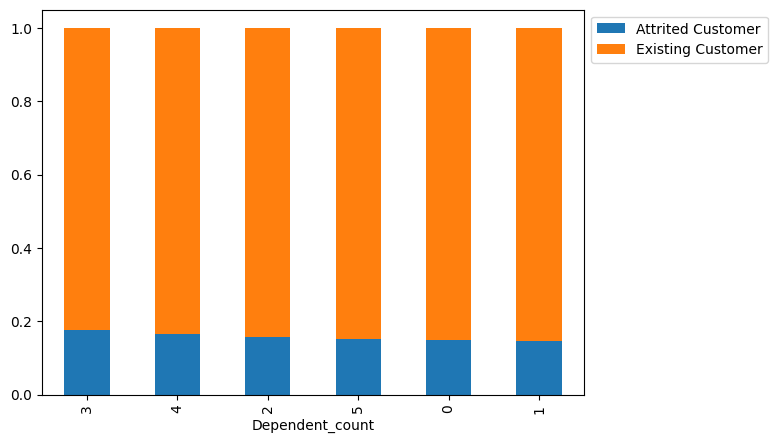

In [71]:
stacked_barplot(churn_data, "Dependent_count", "Attrition_Flag")

### Observations
* Much like income level, all dependent levels appear to attrit in similar ratios.
* Those with 3 or 4 `Dependent_count` have a slightly higher ratio of attrition than others.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
All                          1627               8500  10127
Married                       838               4598   5436
Single                        668               3275   3943
Divorced                      121                627    748
------------------------------------------------------------------------------------------------------------------------


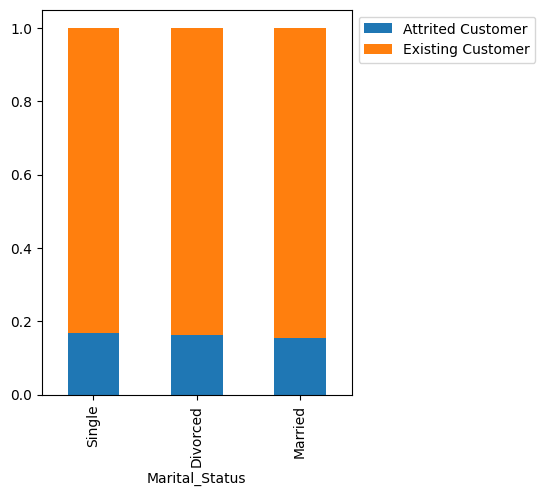

In [72]:
stacked_barplot(churn_data, "Marital_Status", "Attrition_Flag")

### Observations
* Customers who are single have a slightly higher attrition ratio than the divorced or married.
* Married people make up the largest group of those who attrit.

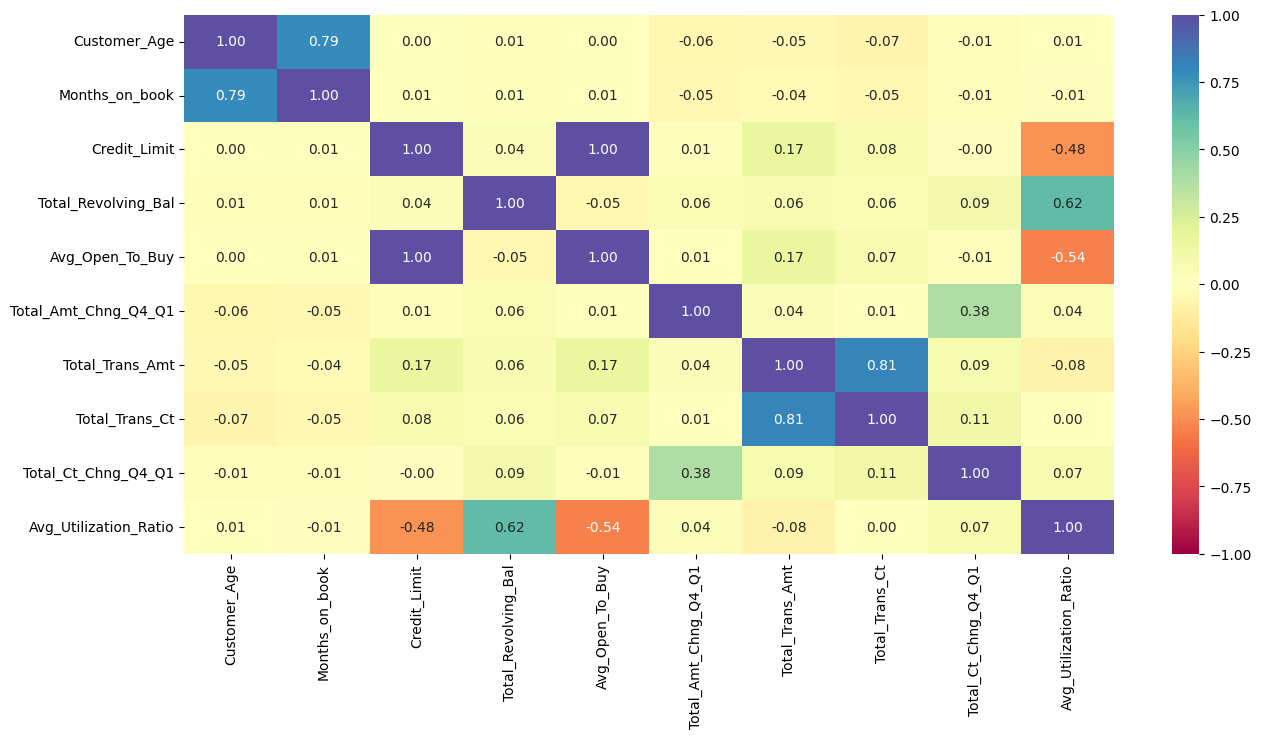

In [73]:
# plot correlation matrix
plt.figure(figsize=(15, 7))
sns.heatmap(churn_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations
* `Customer_Age` is correlated with `Months_on_book` which is likely due to longstanding customer relationships. (older customers having accounts open longer)
* `Total_Trans_Ct` is highly correlated with `Total_Trans_Amt` which is likely due to standard patterns of usage by customers.
* `Avg_Utilization_Ratio` has a correlation with `Total_Revolving_Bal` which is likely due to it being different views of the overall balance.
* `Avg_Utilization_Ratio` has a negative correlation with `Credit_Limit` and `Avg_Open_To_Buy` which again makes sense since as `Credit_Limit` and `Avg_Open_To_Buy` decrease the `Avg_Utilization_Ratio` will increase.
* `Total_Amt_Chng_Q4_Q1` and `Total_Ct_Chng_Q4_Q1` are slightly correlated, which makes sense since those 2 variables are related to a similar time period.
* Other variables have no significant correlation.


## Data Pre-processing

Outlier Detection

In [74]:
Q1 = churn_data.quantile(0.25)  # To find the 25th percentile
Q3 = churn_data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [75]:
# checking the % outliers
((churn_data.select_dtypes(include=["float64", "int64"]) < lower) | (churn_data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(churn_data) * 100

Customer_Age            0.020
Months_on_book          3.812
Credit_Limit            9.717
Total_Revolving_Bal     0.000
Avg_Open_To_Buy         9.509
Total_Amt_Chng_Q4_Q1    3.910
Total_Trans_Amt         8.848
Total_Trans_Ct          0.020
Total_Ct_Chng_Q4_Q1     3.891
Avg_Utilization_Ratio   0.000
dtype: float64

### Observations
* `Credit_Limit`, `Avg_Open_To_Buy` and `Total_Trans_Amt` have almost 10% outliers, but this data appears to be actual and in line with trends, so we will not adjust it at this time.

In [76]:
churn_data["Attrition_Flag"].value_counts(1)

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64

### Observations
* The data is highly imbalanced towards existing customers

In [77]:
#Copy churn_data
new_churn_data = churn_data.copy()

In [78]:
# encode categorical variables
encode_attrition = {'Existing Customer':0, 'Attrited Customer':1}
new_churn_data['Attrition_Flag']=new_churn_data['Attrition_Flag'].map(encode_attrition)

encode_marital_status = {'Married':1,'Single':2, 'Divorced':3}
new_churn_data['Marital_Status']=new_churn_data['Marital_Status'].map(encode_marital_status)

encode_education = {'Uneducated':1,'High School':2, 'Graduate':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
new_churn_data['Education_Level']=new_churn_data['Education_Level'].map(encode_education)

encode_income = {'Less than $40K':1,'$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
new_churn_data['Income_Category']=new_churn_data['Income_Category'].map(encode_income)

In [79]:
#new_churn_data = churn_data.copy()

X = new_churn_data.drop(["Attrition_Flag"], axis=1)
y = new_churn_data["Attrition_Flag"]

# Create an instance of SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the target variable
y = imputer.fit_transform(new_churn_data[['Attrition_Flag']])

# impute the missing values - removed since I did it before I did analysis.
#imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
#cols_to_impute = ['Income_Category','Education_Level','Marital_Status']
# fit and transform the imputer on train data
#X[cols_to_impute] = imp_mode.fit_transform(X[cols_to_impute])

In [80]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


## Missing value imputation




In [81]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [82]:
X_train.head()

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
800             40              21     20056.000                 1602   
498             44              34      2885.000                 1895   
4356            48              36      6798.000                 2517   
407             41              36     27000.000                    0   
8728            46              36     15034.000                 1356   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
800         18454.000                 0.466             1687              46   
498           990.000                 0.387             1366              31   
4356         4281.000                 0.873             4327              79   
407         27000.000                 0.610             1209              39   
8728        13678.000                 0.754             7737              84   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  Dependent_count_1  \
800                 0.533                  0.080         1                  0   
498                 0.632                  0.657         1                  1   
4356                0.881                  0.370         1                  0   
407                 0.300                  0.000         1                  0   
8728                0.750                  0.090         1                  0   

      Dependent_count_2  Dependent_count_3  Dependent_count_4  \
800                   1                  0                  0   
498                   0                  0                  0   
4356                  0                  0                  1   
407                   1                  0                  0   
8728                  0                  0                  1   

      Dependent_count_5  Education_Level_6  Education_Level_3  \
800                   0                  0                  1   
498                   0                  0                  1   
4356                  0                  0                  0   
407                   0                  0                  1   
8728                  0                  0                  0   

      Education_Level_2  Education_Level_5  Education_Level_1  \
800                   0                  0                  0   
498                   0                  0                  0   
4356                  1                  0                  0   
407                   0                  0                  0   
8728                  1                  0                  0   

      Marital_Status_1  Marital_Status_2  Income_Category_2  \
800                  0                 1                  0   
498                  1                 0                  0   
4356                 1                 0                  0   
407                  1                 0                  0   
8728                 0                 0                  1   

      Income_Category_3  Income_Category_4  Income_Category_1  \
800                   0                  0                  0   
498                   0                  0                  1   
4356                  0                  1                  0   
407                   1                  0                  0   
8728                  0                  0                  0   

      Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  \
800                    0                       0                     0   
498                    0                       0                     0   
4356                   0                       0                     0   
407                    0                       0                     1   
8728                   0                       0                     1   

      Total_Relationship_Count_2  Total_Relationship_Count_3  \
800                            0                           0   
498                            0                           0   
4356               

In [83]:
X_val.head()

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
2894            37              27     15326.000                    0   
9158            58              46     10286.000                    0   
9618            42              23     34516.000                 2070   
9910            47              36      9683.000                 1116   
5497            60              36      2688.000                 1617   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
2894        15326.000                 1.159             2990              55   
9158        10286.000                 0.908             8199              59   
9618        32446.000                 0.880            13781             102   
9910         8567.000                 0.721            15627             104   
5497         1071.000                 0.552             4183              71   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  Dependent_count_1  \
2894                0.964                  0.000         1                  0   
9158                0.903                  0.000         1                  0   
9618                0.545                  0.060         1                  0   
9910                0.825                  0.115         1                  0   
5497                0.614                  0.602         0                  1   

      Dependent_count_2  Dependent_count_3  Dependent_count_4  \
2894                  0                  0                  0   
9158                  1                  0                  0   
9618                  0                  1                  0   
9910                  0                  1                  0   
5497                  0                  0                  0   

      Dependent_count_5  Education_Level_6  Education_Level_3  \
2894                  0                  0                  0   
9158                  0                  0                  0   
9618                  0                  0                  0   
9910                  0                  0                  1   
5497                  0                  0                  0   

      Education_Level_2  Education_Level_5  Education_Level_1  \
2894                  0                  1                  0   
9158                  0                  0                  1   
9618                  0                  0                  1   
9910                  0                  0                  0   
5497                  1                  0                  0   

      Marital_Status_1  Marital_Status_2  Income_Category_2  \
2894                 0                 1                  0   
9158                 0                 1                  0   
9618                 1                 0                  0   
9910                 1                 0                  0   
5497                 0                 1                  0   

      Income_Category_3  Income_Category_4  Income_Category_1  \
2894                  0                  1                  0   
9158                  0                  1                  0   
9618                  0                  0                  0   
9910                  0                  1                  0   
5497                  0                  0                  1   

      Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  \
2894                   0                       0                     0   
9158                   0                       0                     0   
9618                   0                       1                     0   
9910                   0                       0                     0   
5497                   0                       0                     0   

      Total_Relationship_Count_2  Total_Relationship_Count_3  \
2894                           0                           0   
9158                           0                           0   
9618               

In [84]:
X_test.head()

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
9760            32              26      6407.000                 1130   
7413            50              36      2317.000                    0   
6074            54              36      3892.000                    0   
3520            61              36     24172.000                 2517   
6103            41              15      4312.000                 2517   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9760         5277.000                 0.756            14471              93   
7413         2317.000                 0.734             2214              41   
6074         3892.000                 0.738             4318              74   
3520        21655.000                 0.424             1658              27   
6103         1795.000                 0.741             2693              56   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  Dependent_count_1  \
9760                0.603                  0.176         1                  1   
7413                0.519                  0.000         1                  1   
6074                0.762                  0.000         0                  0   
3520                0.500                  0.104         1                  0   
6103                0.436                  0.584         0                  0   

      Dependent_count_2  Dependent_count_3  Dependent_count_4  \
9760                  0                  0                  0   
7413                  0                  0                  0   
6074                  1                  0                  0   
3520                  0                  0                  0   
6103                  0                  1                  0   

      Dependent_count_5  Education_Level_6  Education_Level_3  \
9760                  0                  0                  0   
7413                  0                  0                  0   
6074                  0                  0                  0   
3520                  0                  0                  0   
6103                  0                  0                  0   

      Education_Level_2  Education_Level_5  Education_Level_1  \
9760                  1                  0                  0   
7413                  0                  1                  0   
6074                  1                  0                  0   
3520                  0                  0                  1   
6103                  0                  0                  0   

      Marital_Status_1  Marital_Status_2  Income_Category_2  \
9760                 0                 1                  0   
7413                 0                 1                  0   
6074                 1                 0                  1   
3520                 1                 0                  0   
6103                 1                 0                  1   

      Income_Category_3  Income_Category_4  Income_Category_1  \
9760                  0                  1                  0   
7413                  1                  0                  0   
6074                  0                  0                  0   
3520                  0                  0                  0   
6103                  0                  0                  0   

      Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  \
9760                   0                       0                     0   
7413                   0                       0                     0   
6074                   0                       0                     0   
3520                   0                       0                     0   
6103                   0                       0                     0   

      Total_Relationship_Count_2  Total_Relationship_Count_3  \
9760                           1                           0   
7413                           0                           0   
6074               

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- True negatives (TN) are correctly predicted by the model.
- False negatives (FN) are real failures where it is not detected by the model.
- False positives (FP) are failures detected by the model when it should not have been.

- accuracy - how many of our predictions were true
- precision - of our postive predictions, how many were true?
- recall - out of all the ones that should be true, how many did we correctly predict
- f1 - how effective we make the tradeoff between precision and recall

Since Thera bank wants to target customers who are at risk of attriting, they would want to focus on recall to maximize detection of customers at risk and avoid false negatives. 

In [85]:
def make_confusion_matrix(y_actual,y_predict,title):

  cm = confusion_matrix(y_actual, y_predict)

  # Define class labels
  class_labels = ['Class 0', 'Class 1']

  # Create a heatmap using seaborn
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

  # Add labels, title, and axis ticks
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(title)
  plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
  plt.yticks(ticks=[0.5, 1.5], labels=class_labels)

  # Show the plot
  plt.show()

In [86]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(name, model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    name: type of predictor
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    print(name)
    print(df_perf)
    return df_perf

### Model Building with original data

In [87]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training recall performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation recall performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training recall performance:

Logistic regression: 0.24692622950819673
Decision Tree: 1.0
Random Forest: 1.0
Bagging: 0.985655737704918
AdaBoost: 0.8391393442622951
Gradient Boosting: 0.8719262295081968
XGBoost: 1.0

Validation recall performance:

Logistic regression: 0.3067484662576687
Decision Tree: 0.7822085889570553
Random Forest: 0.745398773006135
Bagging: 0.7944785276073619
AdaBoost: 0.8251533742331288
Gradient Boosting: 0.8282208588957055
XGBoost: 0.8957055214723927


In [88]:
print("\nTraining and Validation original data recall performance difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation original data recall performance difference:

Logistic regression: Training Score: 0.2469, Validation Score: 0.3067, Difference: -0.0598
Decision Tree: Training Score: 1.0000, Validation Score: 0.7822, Difference: 0.2178
Random Forest: Training Score: 1.0000, Validation Score: 0.7454, Difference: 0.2546
Bagging: Training Score: 0.9857, Validation Score: 0.7945, Difference: 0.1912
AdaBoost: Training Score: 0.8391, Validation Score: 0.8252, Difference: 0.0140
Gradient Boosting: Training Score: 0.8719, Validation Score: 0.8282, Difference: 0.0437
XGBoost: Training Score: 1.0000, Validation Score: 0.8957, Difference: 0.1043


### Observations

The training performance of several of the models were very high.
Decision Tree, Random Forest, and XGBoost were perfect and Bagging was very high at 99%, while other models scored in the 80% range and Logistic regression doing very poorly at 25%.

Validation scores for XGBoost was the highest at 90% while all other models were significantly less.

We will next try to improve these scores by over and under sampling to try and balance the class distribution of the Attrition_Flag of 84% Exisiting and only 16% attrited.

### Model Building with Oversampled data


In [89]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [90]:
# Synthetic Minority Over Sampling Technique
print(f"Before OverSampling, number of attrited customers: {sum(y_train==1)}")
print(f"Before OverSampling, number of existing customers: {sum(y_train==0)} \n")

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)
#X_train_over, y_train_over = sm.fit_resample(X_train, y_train.ravel())
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print(f"After OverSampling, number of attrited customers: {sum(y_train_over==1)}")
print(f"After OverSampling, number of existing customers: {sum(y_train_over==0)} \n")

print(f'After OverSampling, the shape of train_X: {X_train_over.shape}')
print(f'After OverSampling, the shape of train_y: {y_train_over.shape} \n')

Before OverSampling, number of attrited customers: [976]
Before OverSampling, number of existing customers: [5099] 

After OverSampling, number of attrited customers: 5099
After OverSampling, number of existing customers: 5099 

After OverSampling, the shape of train_X: (10198, 47)
After OverSampling, the shape of train_y: (10198,) 



In [91]:
print("\n" "Training performance after oversampling:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    model_performance_classification_sklearn(name, model, X_train, y_train)

print("\n" "Validation performance after oversampling:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    model_performance_classification_sklearn(name, model, X_val, y_val)


Training performance after oversampling:

Logistic regression
   Accuracy  Recall  Precision    F1
0     0.841   0.472      0.505 0.488
Decision Tree
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Random Forest
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Bagging
   Accuracy  Recall  Precision    F1
0     0.998   0.993      0.993 0.993
AdaBoost
   Accuracy  Recall  Precision    F1
0     0.951   0.850      0.848 0.849
Gradient Boosting
   Accuracy  Recall  Precision    F1
0     0.971   0.915      0.907 0.911
XGBoost
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation performance after oversampling:

Logistic regression
   Accuracy  Recall  Precision    F1
0     0.839   0.466      0.500 0.483
Decision Tree
   Accuracy  Recall  Precision    F1
0     0.935   0.828      0.780 0.804
Random Forest
   Accuracy  Recall  Precision    F1
0     0.946   0.788      0.862 0.824
Bagging
   Accuracy  Recall  Prec

In [92]:
print("\nTraining and Validation oversampling data recall performance difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation oversampling data recall performance difference:

Logistic regression: Training Score: 0.8631, Validation Score: 0.4663, Difference: 0.3969
Decision Tree: Training Score: 1.0000, Validation Score: 0.8282, Difference: 0.1718
Random Forest: Training Score: 1.0000, Validation Score: 0.7883, Difference: 0.2117
Bagging: Training Score: 0.9973, Validation Score: 0.8558, Difference: 0.1414
AdaBoost: Training Score: 0.9674, Validation Score: 0.8834, Difference: 0.0840
Gradient Boosting: Training Score: 0.9808, Validation Score: 0.8865, Difference: 0.0943
XGBoost: Training Score: 1.0000, Validation Score: 0.9110, Difference: 0.0890


### Observations

We applied oversampling using SMOTE and then retrained the models.
Decision Tree, Random Forest, and XGBoost were perfect and Bagging was very high at 99.7%. All other models increased significantly over their previous training scores, with most in the high 90s and even Logistic regression increased from 25% to 86%.

Validation scores for XGBoost was the highest at 91% (an increase of 1%) while all other models were significantly less but still improved over their previous scores.

### Model Building with Undersampled data

In [93]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [94]:
print("\n" "Training performance after undersampling:" "\n")
for name, model in models:
    model.fit(X_train_under, y_train_under)
    model_performance_classification_sklearn(name, model, X_train, y_train)

print("\n" "Validation performance after undersampling:" "\n")
for name, model in models:
    model.fit(X_train_under, y_train_under)
    model_performance_classification_sklearn(name, model, X_val, y_val)


Training performance after undersampling:

Logistic regression
   Accuracy  Recall  Precision    F1
0     0.773   0.814      0.398 0.535
Decision Tree
   Accuracy  Recall  Precision    F1
0     0.909   1.000      0.638 0.779
Random Forest
   Accuracy  Recall  Precision    F1
0     0.940   1.000      0.728 0.842
Bagging
   Accuracy  Recall  Precision    F1
0     0.941   0.991      0.734 0.843
AdaBoost
   Accuracy  Recall  Precision    F1
0     0.928   0.950      0.704 0.809
Gradient Boosting
   Accuracy  Recall  Precision    F1
0     0.941   0.981      0.740 0.843
XGBoost
   Accuracy  Recall  Precision    F1
0     0.953   1.000      0.775 0.873

Validation performance after undersampling:

Logistic regression
   Accuracy  Recall  Precision    F1
0     0.777   0.816      0.405 0.541
Decision Tree
   Accuracy  Recall  Precision    F1
0     0.878   0.880      0.579 0.698
Random Forest
   Accuracy  Recall  Precision    F1
0     0.922   0.926      0.691 0.792
Bagging
   Accuracy  Recall  Pr

In [95]:
print("\nTraining and Validation undersampling data recall performance difference:\n")

for name, model in models:
    model.fit(X_train_under, y_train_under)
    scores_train = recall_score(y_train_under, model.predict(X_train_under))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation undersampling data recall performance difference:

Logistic regression: Training Score: 0.8135, Validation Score: 0.8160, Difference: -0.0024
Decision Tree: Training Score: 1.0000, Validation Score: 0.8804, Difference: 0.1196
Random Forest: Training Score: 1.0000, Validation Score: 0.9264, Difference: 0.0736
Bagging: Training Score: 0.9908, Validation Score: 0.9233, Difference: 0.0675
AdaBoost: Training Score: 0.9498, Validation Score: 0.9509, Difference: -0.0011
Gradient Boosting: Training Score: 0.9805, Validation Score: 0.9479, Difference: 0.0327
XGBoost: Training Score: 1.0000, Validation Score: 0.9601, Difference: 0.0399


### Observations

We applied undersampling using RandomUnderSampler and then retrained the models. Decision Tree, Random Forest, and XGBoost were perfect again and Bagging was very high at 99%. All other models showed similar performance to the oversampling training scores.

Validation scores for XGBoost was the highest at 96% (an increase of 6% over original) while all other models were less but still improved over their previous scores. 

Undersampling overall seems to have the best performance in the models, but we will still have to see how hyperparameter tuning affects original, oversampling and undersampling for the 3 strongest performing models of XGBoost, AdaBoost and Gradient boosting.

# HyperparameterTuning

# Tuning XGBoost

## Tuning with Original data

In [96]:
# Hyperparameter tuning XGBoost original data

# Define the parameter grid for hyperparameter tuning
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training performance XGBoost after hyperparameter tuning with original data:" "\n")
xgb_orig_train=model_performance_classification_sklearn("", best_model, X_train, y_train)

print("\n" "Validation performance XGBoost after hyperparameter tuning with original data:" "\n")
xgb_orig_val=model_performance_classification_sklearn("", best_model, X_val, y_val)
xgb_orig_val

Best Hyperparameters:
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1}

Training performance XGBoost after hyperparameter tuning with original data:


   Accuracy  Recall  Precision    F1
0     0.983   0.929      0.966 0.947

Validation performance XGBoost after hyperparameter tuning with original data:


   Accuracy  Recall  Precision    F1
0     0.967   0.868      0.922 0.894


Accuracy  Recall  Precision    F1
0     0.967   0.868      0.922 0.894

### Observations
* The XGBoost model tuned with original data using Randomized search achieved almost 93% on training data and 87% on the validation data.
* This is actually lower than the non-tuned original data performance of 
    * XGBoost: Training Score: 1.0000, Validation Score: 0.8957, Difference: 0.1043

## Tuning with Undersampled data

In [97]:
# Hyperparameter tuning XGBoost undersampled data

# Define the parameter grid for hyperparameter tuning
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train_under, y_train_under)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training performance XGBoost after hyperparameter tuning with undersampled data:" "\n")
xgb_under_train=model_performance_classification_sklearn("", best_model, X_train_under, y_train_under)
xgb_under_train

print("\n" "Validation performance XGBoost after hyperparameter tuning with undersampled data:" "\n")
xgb_under_val=model_performance_classification_sklearn("", best_model, X_val, y_val)
xgb_under_val

Best Hyperparameters:
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1}

Training performance XGBoost after hyperparameter tuning with undersampled data:


   Accuracy  Recall  Precision    F1
0     0.986   0.993      0.980 0.986

Validation performance XGBoost after hyperparameter tuning with undersampled data:


   Accuracy  Recall  Precision    F1
0     0.932   0.951      0.718 0.818


Accuracy  Recall  Precision    F1
0     0.932   0.951      0.718 0.818

### Observations
* The XGBoost model tuned with undersampled data using Randomized search achieved 99% on training data and 95% on the validation data
* This is an improvement over the original data tuning of 93% on training data and 87% on validation, but still lower than the non-tuned undersampled data performance of
    * XGBoost: Training Score: 1.0000, Validation Score: 0.9601, Difference: 0.0399

## Tuning with Oversampled data

In [98]:
# Hyperparameter tuning XGBoost oversampled data

# Define the parameter grid for hyperparameter tuning
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train_over, y_train_over)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training performance XGBoost after hyperparameter tuning with oversampled data:" "\n")
xgb_over_train=model_performance_classification_sklearn("", best_model, X_train_over, y_train_over)
xgb_over_train

print("\n" "Validation performance XGBoost after hyperparameter tuning with oversampled data:" "\n")
xgb_over_val=model_performance_classification_sklearn("", best_model, X_val, y_val)
xgb_over_val

Best Hyperparameters:
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 3}

Training performance XGBoost after hyperparameter tuning with oversampled data:


   Accuracy  Recall  Precision    F1
0     0.980   0.984      0.976 0.980

Validation performance XGBoost after hyperparameter tuning with oversampled data:


   Accuracy  Recall  Precision    F1
0     0.949   0.905      0.804 0.851


Accuracy  Recall  Precision    F1
0     0.949   0.905      0.804 0.851

### Observations
* The XGBoost model tuned with oversampled data using Randomized search achieved 98% on training data and 90% on the validation data
* This is an improvement over the original data tuning of 93% on training data and 87% on validation, but still lower than the non-tuned oversampled data performance of
    * XGBoost: Training Score: 1.0000, Validation Score: 0.9110, Difference: 0.0890

## XGBoost Observations
* The XGBoost model tuned with undersampled data using Randomized search achieved 99% on training data and 95% on the validation data, this is the best performing model of all the tuned XGBoost models.

# Tuning ADABoost

## Tuning with Original data

In [99]:
# Hyperparameter tuning AdaBoost original data

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=1)

# Perform hyperparameter tuning using RandomizedSearchCV
clf = RandomizedSearchCV(estimator=adaboost, param_distributions=param_grid, cv=5, random_state=1, n_iter=10)
clf.fit(X_train, y_train)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(clf.best_params_)

print("\n" "Training performance AdaBoost after hyperparameter tuning with original data:" "\n")
adaboost_orig_train=model_performance_classification_sklearn("", clf, X_train, y_train)
adaboost_orig_train

print("\n" "Validation performance AdaBoost after hyperparameter tuning with original data:" "\n")
adaboost_orig_val=model_performance_classification_sklearn("", clf, X_val, y_val)
adaboost_orig_val

Best Hyperparameters:
{'n_estimators': 75, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

Training performance AdaBoost after hyperparameter tuning with original data:


   Accuracy  Recall  Precision    F1
0     0.976   0.888      0.957 0.921

Validation performance AdaBoost after hyperparameter tuning with original data:


   Accuracy  Recall  Precision    F1
0     0.964   0.834      0.935 0.882


Accuracy  Recall  Precision    F1
0     0.964   0.834      0.935 0.882

### Observations
* The AdaBoost model tuned with the original data using Randomized search achieved 89% on training data and 83% on the validation data
* This is higher than the non-tuned original data performance of
    * AdaBoost: Training Score: 0.8391, Validation Score: 0.8252, Difference: 0.0140

## Tuning with Undersampled data

In [100]:
# Hyperparameter tuning AdaBoost undersampled data

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=1)

# Perform hyperparameter tuning using RandomizedSearchCV
clf = RandomizedSearchCV(estimator=adaboost, param_distributions=param_grid, cv=5, random_state=1, n_iter=10)
clf.fit(X_train_under, y_train_under)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(clf.best_params_)

print("\n" "Training performance AdaBoost after hyperparameter tuning with undersampled data:" "\n")
adaboost_under_train=model_performance_classification_sklearn("", clf, X_train_under, y_train_under)
adaboost_under_train

print("\n" "Validation performance AdaBoost after hyperparameter tuning with undersampled data:" "\n")
adaboost_under_val=model_performance_classification_sklearn("", clf, X_val, y_val)
adaboost_under_val

Best Hyperparameters:
{'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

Training performance AdaBoost after hyperparameter tuning with undersampled data:


   Accuracy  Recall  Precision    F1
0     0.990   0.996      0.985 0.990

Validation performance AdaBoost after hyperparameter tuning with undersampled data:


   Accuracy  Recall  Precision    F1
0     0.938   0.957      0.736 0.832


Accuracy  Recall  Precision    F1
0     0.938   0.957      0.736 0.832

### Observations
* The AdaBoost model tuned with undersampled data using Randomized search achieved 99.6% on training data and 96% on the validation data
* This is a significant improvement over the original data tuning of 84% on training data and 83% on validation, and higher than the non-tuned undersampled data performance of
    * AdaBoost: Training Score: 0.9498, Validation Score: 0.9509, Difference: -0.0011

## Tuning with Oversampled data

In [101]:
# Hyperparameter tuning AdaBoost oversampled data

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=1)

# Perform hyperparameter tuning using RandomizedSearchCV
clf = RandomizedSearchCV(estimator=adaboost, param_distributions=param_grid, cv=5, random_state=1, n_iter=10)
clf.fit(X_train_over, y_train_over)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(clf.best_params_)

print("\n" "Training performance AdaBoost after hyperparameter tuning with oversampled data:" "\n")
adaboost_over_train=model_performance_classification_sklearn("", clf, X_train_over, y_train_over)
adaboost_over_train

print("\n" "Validation performance AdaBoost after hyperparameter tuning with oversampled data:" "\n")
adaboost_over_val=model_performance_classification_sklearn("", clf, X_val, y_val)
adaboost_over_val

Best Hyperparameters:
{'n_estimators': 50, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

Training performance AdaBoost after hyperparameter tuning with oversampled data:


   Accuracy  Recall  Precision    F1
0     0.963   0.976      0.952 0.964

Validation performance AdaBoost after hyperparameter tuning with oversampled data:


   Accuracy  Recall  Precision    F1
0     0.936   0.871      0.765 0.815


Accuracy  Recall  Precision    F1
0     0.936   0.871      0.765 0.815

### Observations
* The AdaBoost model tuned with oversampled data using Randomized search achieved 98% on training data and 87% on the validation data
* This is a significant improvement over the original data tuning of 84% on training data and 83% on validation, but lower than the non-tuned oversampled data performance of
    * AdaBoost: Training Score: 0.9674, Validation Score: 0.8834, Difference: 0.0840
* The oversampled model performed worse in validation that the undersampled version.

## AdaBoost Observations
* The AdaBoost model tuned with undersampled data using Randomized search achieved 99.6% on training data and 96% on the validation data, this is the best performing model of all the tuned AdaBoost models.

# Tuning Gradient

## Tuning with Original data

In [102]:
# Hyperparameter tuning GradientBoostingClassifier original data

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Initialize the GradientBoost model
gb = GradientBoostingClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training performance GradientBoostingClassifier after hyperparameter tuning with original data:" "\n")
gb_orig_train=model_performance_classification_sklearn("", best_model, X_train, y_train)
gb_orig_train

print("\n" "Validation performance GradientBoostingClassifier after hyperparameter tuning with original data:" "\n")
gb_orig_val=model_performance_classification_sklearn("", best_model, X_val, y_val)
gb_orig_val

Best Hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)}

Training performance GradientBoostingClassifier after hyperparameter tuning with original data:


   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation performance GradientBoostingClassifier after hyperparameter tuning with original data:


   Accuracy  Recall  Precision    F1
0     0.933   0.782      0.797 0.789


Accuracy  Recall  Precision    F1
0     0.933   0.782      0.797 0.789

### Observations
* The GradientBoost model tuned with the original data using Randomized search achieved 100% on training data and 78% on the validation data, indicating an overfit scenario.
* This validation score is worse than the non-tuned original data performance of
    * Gradient Boosting: Training Score: 0.8719, Validation Score: 0.8282, Difference: 0.0437

## Tuning with Undersampled data

In [103]:
# Hyperparameter tuning GradientBoostingClassifier undersampled data

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Initialize the GradientBoost model
gb = GradientBoostingClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train_under, y_train_under)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training performance GradientBoostingClassifier after hyperparameter tuning with undersampled dataa:" "\n")
gb_under_train=model_performance_classification_sklearn("", best_model, X_train_under, y_train_under)
gb_under_train

print("\n" "Validation performance GradientBoostingClassifier after hyperparameter tuning with undersampled data:" "\n")
gb_under_val=model_performance_classification_sklearn("", best_model, X_val, y_val)
gb_under_val

Best Hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)}

Training performance GradientBoostingClassifier after hyperparameter tuning with undersampled dataa:


   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation performance GradientBoostingClassifier after hyperparameter tuning with undersampled data:


   Accuracy  Recall  Precision    F1
0     0.878   0.880      0.579 0.698


Accuracy  Recall  Precision    F1
0     0.878   0.880      0.579 0.698

### Observations
* The GradientBoost model tuned with undersampled data using Randomized search achieved 100% on training data and 88% on the validation data, again indicating an overfit on the training data.
* This is an increase over the original data tuning of 87% on training data and 83% on validation, but still lower than the non-tuned undersampled data performance of
    * Gradient Boosting: Training Score: 0.9805, Validation Score: 0.9479, Difference: 0.0327

## Tuning with Oversampled data

In [104]:
# Hyperparameter tuning GradientBoostingClassifier oversampled data

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Initialize the GradientBoost model
gb = GradientBoostingClassifier(random_state=1)

# Perform randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    cv=5,
    random_state=1,
    n_iter=10
)

# Fit the randomized search on your training data
random_search.fit(X_train_over, y_train_over)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(best_params)

print("\n" "Training performance GradientBoostingClassifier after hyperparameter tuning with oversampled data:" "\n")
gb_over_train=model_performance_classification_sklearn("", best_model, X_train_over, y_train_over)
gb_over_train

print("\n" "Validation performance GradientBoostingClassifier after hyperparameter tuning with oversampled data:" "\n")
gb_over_val=model_performance_classification_sklearn("", best_model, X_val, y_val)
gb_over_val

Best Hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)}

Training performance GradientBoostingClassifier after hyperparameter tuning with oversampled data:


   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation performance GradientBoostingClassifier after hyperparameter tuning with oversampled data:


   Accuracy  Recall  Precision    F1
0     0.935   0.828      0.780 0.804


Accuracy  Recall  Precision    F1
0     0.935   0.828      0.780 0.804

### Observations
* The GradientBoost model tuned with oversampled data using Randomized search achieved 100% on training data and 83% on the validation data, again indicating an overfit on the training data.

* This performed about the same on validation as original data tuning of 83% on validation, but still lower than the non-tuned uoversampled data performance of
    * Gradient Boosting: Training Score: 0.9808, Validation Score: 0.8865, Difference: 0.0943

## GradientBoost Observations
* The GradientBoost models all suffered from overfit on the training data, with poor performance on the validation set.

## Model Comparison and Final Model Selection

In [105]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_orig_train.T,
        xgb_under_train.T,
        xgb_over_train.T,
        gb_orig_train.T,
        gb_under_train.T,
        gb_over_train.T,
        adaboost_orig_train.T,
        adaboost_under_train.T,
        adaboost_over_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Original data",
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Oversampled data",
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


XGBoost trained with Original data  \
Accuracy                                0.983   
Recall                                  0.929   
Precision                               0.966   
F1                                      0.947   

           XGBoost trained with Undersampled data  \
Accuracy                                    0.986   
Recall                                      0.993   
Precision                                   0.980   
F1                                          0.986   

           XGBoost trained with Oversampled data  \
Accuracy                                   0.980   
Recall                                     0.984   
Precision                                  0.976   
F1                                         0.980   

           Gradient boosting trained with Original data  \
Accuracy                                          1.000   
Recall                                            1.000   
Precision                                         1.000   
F1                                                1.000   

           Gradient boosting trained with Undersampled data  \
Accuracy                                              1.000   
Recall                                                1.000   
Precision                                             1.000   
F1                                                    1.000   

           Gradient boosting trained with Oversampled data  \
Accuracy                                             1.000   
Recall                                               1.000   
Precision                                            1.000   
F1                                                   1.000   

           AdaBoost trained with Original data  \
Accuracy                                 0.976   
Recall                                   0.888   
Precision                                0.957   
F1                                       0.921   

           AdaBoost trained with Undersampled data  \
Accuracy                                     0.990   
Recall                                       0.996   
Precision                                    0.985   
F1                                           0.990   

           AdaBoost trained with Oversampled data  
Accuracy                                    0.963  
Recall                                      0.976  
Precision                                   0.952  
F1                                          0.964

In [106]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        xgb_orig_val.T,
        xgb_under_val.T,
        xgb_over_val.T,
        gb_orig_val.T,
        gb_under_val.T,
        gb_over_val.T,
        adaboost_orig_val.T,
        adaboost_under_val.T,
        adaboost_over_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost validated with Original data",
    "XGBoost validated with Undersampled data",
    "XGBoost validated with Oversampled data",
    "Gradient boosting validated with Original data",
    "Gradient boosting validated with Undersampled data",
    "Gradient boosting validated with Oversampled data",
    "AdaBoost validated with Original data",
    "AdaBoost validated with Undersampled data",
    "AdaBoost validated with Oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


XGBoost validated with Original data  \
Accuracy                                  0.967   
Recall                                    0.868   
Precision                                 0.922   
F1                                        0.894   

           XGBoost validated with Undersampled data  \
Accuracy                                      0.932   
Recall                                        0.951   
Precision                                     0.718   
F1                                            0.818   

           XGBoost validated with Oversampled data  \
Accuracy                                     0.949   
Recall                                       0.905   
Precision                                    0.804   
F1                                           0.851   

           Gradient boosting validated with Original data  \
Accuracy                                            0.933   
Recall                                              0.782   
Precision                                           0.797   
F1                                                  0.789   

           Gradient boosting validated with Undersampled data  \
Accuracy                                               0.878    
Recall                                                 0.880    
Precision                                              0.579    
F1                                                     0.698    

           Gradient boosting validated with Oversampled data  \
Accuracy                                               0.935   
Recall                                                 0.828   
Precision                                              0.780   
F1                                                     0.804   

           AdaBoost validated with Original data  \
Accuracy                                   0.964   
Recall                                     0.834   
Precision                                  0.935   
F1                                         0.882   

           AdaBoost validated with Undersampled data  \
Accuracy                                       0.938   
Recall                                         0.957   
Precision                                      0.736   
F1                                             0.832   

           AdaBoost validated with Oversampled data  
Accuracy                                      0.936  
Recall                                        0.871  
Precision                                     0.765  
F1                                            0.815

## Observations
* The GradientBoost models all suffered from overfit on the training data, with poor performance on the validation set.
* The AdaBoost model tuned with undersampled data using Randomized search achieved 99.6% on training data and 95.7% on the validation data, this is the best performing model of all the tuned AdaBoost models.
* The XGBoost model tuned with undersampled data using Randomized search achieved 99.3% on training data and 95.1% on the validation data, this is the best performing model of all the tuned XGBoost models.
* The AdaBoost model tuned with undersampled data using Randomized search had the best performance, just slighly beating out the XGBoost model, so it is the model we will use for final testing, though it is likely both models would perform quite similarly.

### Test set final performance


Testing performance AdaBoost after applying best hyperparameters:


   Accuracy  Recall  Precision    F1
0     0.932   0.963      0.713 0.819


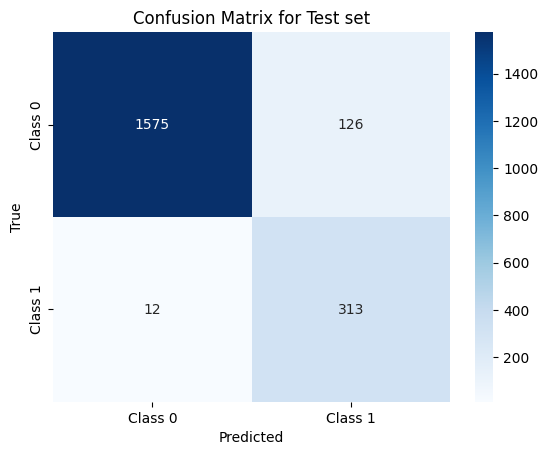

In [107]:
# Performance for AdaBoost for test set
# determined above best params are: 
# {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

# Initialize the XGBoost model using best params
adb = AdaBoostClassifier(
 random_state=1,
 learning_rate =0.1,
 n_estimators=100,
 base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1))
adb_test_model = adb.fit(X_train_under, y_train_under)


print("\n" "Testing performance AdaBoost after applying best hyperparameters:" "\n")
adb_test=model_performance_classification_sklearn("", adb_test_model, X_test, y_test)
adb_test

# make_confusion_matrix(y_train_under,adb_test_model.predict(X_train_under),"Confusion Matrix for Training set")
make_confusion_matrix(y_test,adb_test_model.predict(X_test),"Confusion Matrix for Test set")

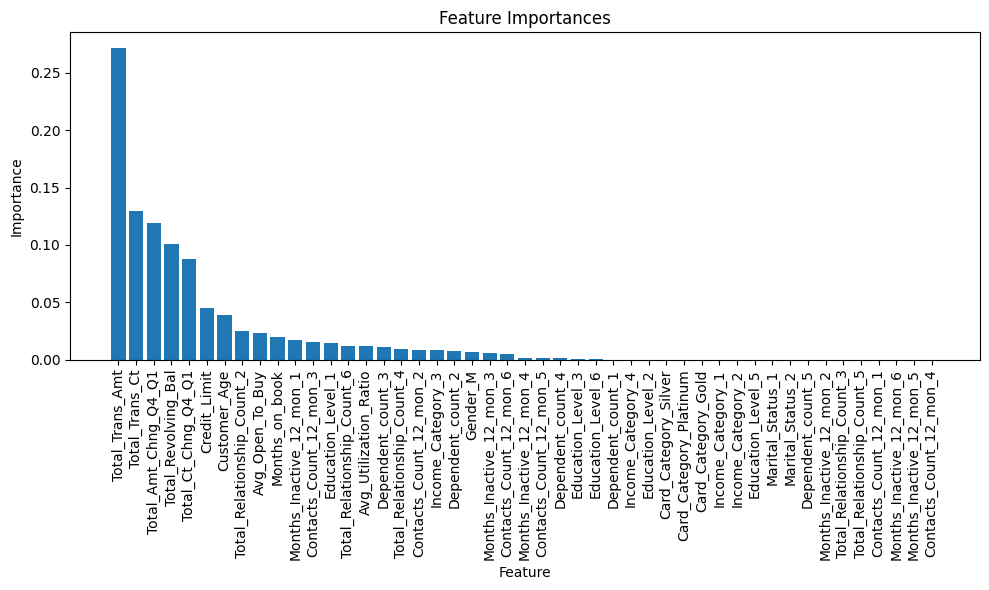

In [108]:
# Get the feature importances from the best model
importances = adb_test_model.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X_test.columns.tolist(), 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

### Observations

The AdaBoost model tuned with undersampled data using Randomized search achieved 99.6% on training data and 95.7% on the validation data, with the testing data reaching 96.3%.

The confusion matrix also shows that there are 126 false negatives out of 2026 total data points in the test set.

The feature importance plot shows that `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Amt_Chng_Q4_Q1`, `Total_Revolving_Bal`, and `Total_Ct_Chng_Q4_Q1` are the top five important features of the model.

# Business Insights and Conclusions

In our analysis, we found that customers who have smaller transaction amounts, lower transaction counts, low card balances and have been inactive for a month are more likely to attrit. Thera bank should look for ways to encourage these customers to utilize their card more often and for higher amounts, like cash back, low promotional interest rates for large purchases or rewards.

Customers with lower credit limits are also more likely to attrit, suggesting that Thera bank should look at ways to help these customers grow their credit and encourage usage. Similarly, customers with 3 or less Thera Bank products attrit at a high rate, indicating that Thera Bank should focus effort on gettign these customers into additional product relationships.

We also found that customers with higher education levels (doctorate or post-graduate), higher income and are older are more likely to attrit, suggesting that they may be outgrowing the need for credit cards or finding alternate solutions. Thera Bank should look for ways to engage these customers with targeted marketing.

Finally, customers who have had 3 or more interactions with the bank in the previous year have attrited at a high rate, possibly indicating dissatisfaction or some issue that went unresolved, leading to closing of the account. Thera Bank should investigate these customers to see if there can be improvements made to keep customers like this from departing.


# Appendix

## Final model using XGBoost

Since XGBoost barely lost out, I decided to make it also to see its results.  An earlier version of the data showed this to be the best model, but after treating the data further AdaBoost won by a slight margin.


Testing performance XGBoost after applying best hyperparameters:


   Accuracy  Recall  Precision    F1
0     0.924   0.963      0.689 0.804


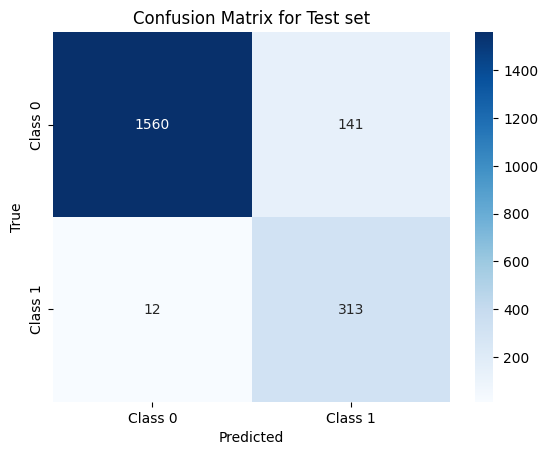

In [109]:
# Performance for XGBoost for test set
# determined above best params are: 
# {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1}

# Initialize the XGBoost model using best params
xgb = XGBClassifier(
 random_state=1,
 learning_rate =0.05,
 n_estimators=100,
 gamma=1,
 subsample=0.7,
 scale_pos_weight=1)
xgb_test_model = xgb.fit(X_train_under, y_train_under)


print("\n" "Testing performance XGBoost after applying best hyperparameters:" "\n")
xgb_test=model_performance_classification_sklearn("", xgb_test_model, X_test, y_test)
xgb_test

# make_confusion_matrix(y_train_under,xgb_test_model.predict(X_train_under),"Confusion Matrix for Training set")
make_confusion_matrix(y_test,xgb_test_model.predict(X_test),"Confusion Matrix for Test set")

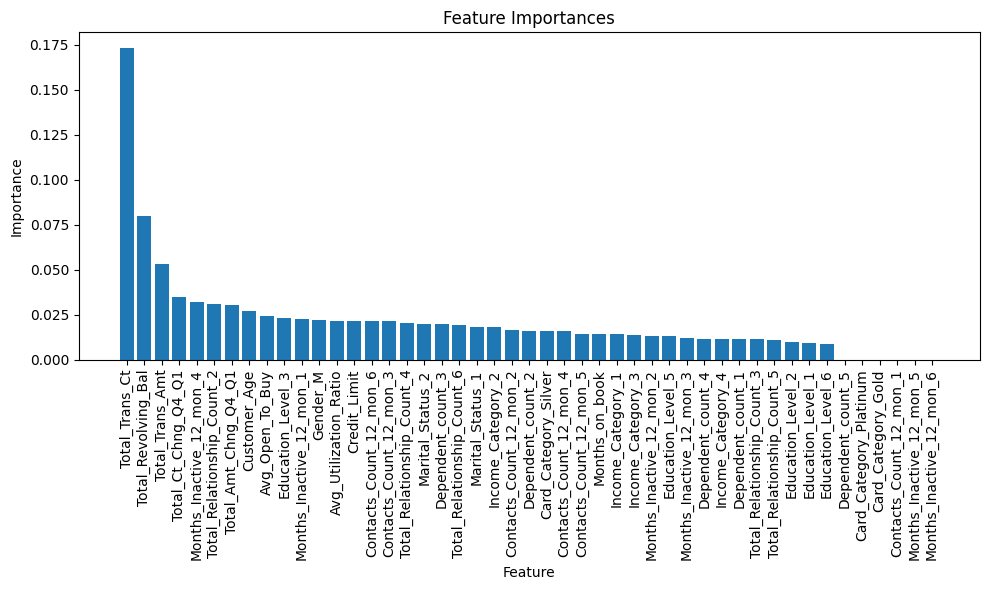

In [110]:
# Get the feature importances from the best model
importances = xgb_test_model.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X_test.columns.tolist(), 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

***